In [404]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [405]:
schlev_data = pd.read_csv('./data_sets/us_census/clean_district_data.csv')
schlev_data.head()

STATE                           NAME_x  NCESID  YRDATA  TOTALREV  TFEDREV  \
0    AL   BALDWIN COUNTY SCHOOL DISTRICT  100270      10    260945    30989   
1    AL   CULLMAN COUNTY SCHOOL DISTRICT  101020      10     84449    13214   
2    AL    ELMORE COUNTY SCHOOL DISTRICT  101290      10     93950    16195   
3    AL      DOTHAN CITY SCHOOL DISTRICT  101230      10     84238    17439   
4    AL  BIRMINGHAM CITY SCHOOL DISTRICT  100390      10    291248    57696   

   FEDRCOMP  FEDRSPEC  FEDRNUTR  FEDROTHR    ...     PPSPUPIL  PPSSTAFF  \
0      8795      7272      6023      8899    ...          486       419   
1      3403      2906      3091      3814    ...          433       319   
2      3076      6214      2693      4212    ...          373       490   
3      5107      3146      3498      5688    ...          508       451   
4     25318      8501     10947     12930    ...          672       939   

   PPSGENAD  PPSSCHAD            DIVISION  REGION  MEAN INCOME  \
0       127       589  East South Central   South        64806   
1       113       614  East South Central   South        45295   
2       174       450  East South Central   South        65957   
3       149       557  East South Central   South        53714   
4       245       685  East South Central   South        42347   

            NAME_y  TOTAL_SCORES  PCT_PASS  
0   BALDWIN COUNTY          2263      86.0  
1   CULLMAN COUNTY           790      87.0  
2    ELMORE COUNTY           894      84.0  
3      DOTHAN CITY           760      87.0  
4  BIRMINGHAM CITY          2075      73.0  

[5 rows x 69 columns]

In [406]:
schlev_data['TOTALREV'].describe()

count    1.497000e+03
mean     3.478117e+05
std      4.018539e+05
min      6.994600e+04
25%      1.441020e+05
50%      2.218900e+05
75%      3.757050e+05
max      3.359206e+06
Name: TOTALREV, dtype: float64

In [407]:
schlev_data['PCTLTOT'].describe()

count    1497.000000
mean       41.488444
std        16.707048
min         6.800000
25%        29.600000
50%        39.100000
75%        52.100000
max        93.300000
Name: PCTLTOT, dtype: float64

In [408]:
schlev_data['PPCSTOT'].describe()

count     1497.000000
mean     10234.140281
std       2723.682643
min       5195.000000
25%       8486.000000
50%       9498.000000
75%      10928.000000
max      23328.000000
Name: PPCSTOT, dtype: float64

In [409]:
schlev_data['MEAN INCOME'].describe()

count      1497.000000
mean      72098.617234
std       44653.645741
min       17760.000000
25%       54222.000000
50%       64416.000000
75%       78046.000000
max      781796.000000
Name: MEAN INCOME, dtype: float64

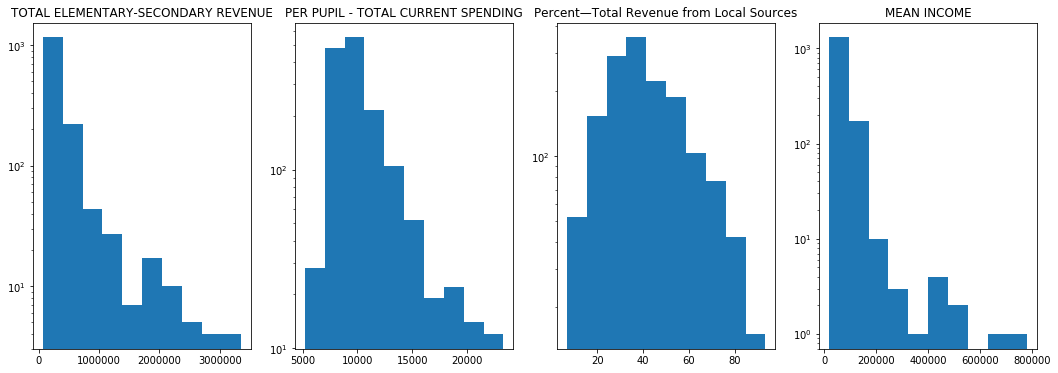

In [410]:
fig, axes = plt.subplots(ncols=4)
axes[0].hist(x=schlev_data['TOTALREV'], log=True)
axes[0].set_title('TOTAL ELEMENTARY-SECONDARY REVENUE')
axes[2].hist(x=schlev_data['PCTLTOT'], log=True)
axes[2].set_title('Percent—Total Revenue from Local Sources')
axes[1].hist(x=schlev_data['PPCSTOT'], log=True)
axes[1].set_title('PER PUPIL - TOTAL CURRENT SPENDING')
axes[3].hist(x=schlev_data['MEAN INCOME'], log=True)
axes[3].set_title('MEAN INCOME')
fig.set_size_inches(18, 6)

All the distributions are skewed right except for the percent of revenue from local sources which is more closely normally distributed.

In [411]:
schlev_data.groupby('REGION').describe()['TOTALREV']

count           mean            std       min        25%       50%  \
REGION                                                                          
Midwest    461.0  219769.002169  111331.664744   75340.0  139643.00  185632.0   
Northeast   72.0  319763.944444  200601.410375  104154.0  172630.75  232968.0   
South      718.0  423721.137883  475195.141924   69946.0  143377.00  246452.0   
West       246.0  374413.662602  491532.577438   86163.0  156318.75  271513.5   

                 75%        max  
REGION                           
Midwest    267937.00   729047.0  
Northeast  533823.50   747268.0  
South      491956.75  2710577.0  
West       394804.75  3359206.0

In [412]:
schlev_data.groupby('REGION').describe()['PPCSTOT']

count          mean          std      min       25%      50%  \
REGION                                                                    
Midwest    461.0  10796.206074  1706.197511   7374.0   9632.00  10416.0   
Northeast   72.0  17667.861111  3271.937499  12352.0  14780.75  18104.5   
South      718.0   9552.859331  2135.738491   7129.0   8315.25   8893.0   
West       246.0   8993.569106  1908.151729   5195.0   7793.00   8567.0   

                75%      max  
REGION                        
Midwest    11640.00  17327.0  
Northeast  20444.75  23328.0  
South      10052.75  21974.0  
West        9963.75  15596.0

In [413]:
schlev_data.groupby('REGION').describe()['PCTLTOT']

count       mean        std   min     25%    50%     75%   max
REGION                                                                   
Midwest    461.0  41.085683  15.389311   8.2  29.700  37.80  50.600  81.5
Northeast   72.0  40.323611  27.263350   6.8  10.575  41.50  67.550  84.2
South      718.0  44.991643  15.115095  18.6  34.525  42.05  53.500  93.3
West       246.0  32.359350  15.979565   8.7  19.850  28.95  37.275  79.2

In [414]:
schlev_data.groupby('REGION').describe()['MEAN INCOME']

count          mean           std      min       25%      50%  \
REGION                                                                     
Midwest    461.0  67421.954447  26821.071948  23527.0  51015.00  61208.0   
Northeast   72.0  66188.833333  22804.326102  22871.0  48453.50  65018.0   
South      718.0  73472.306407  51413.146534  20840.0  55656.75  64075.5   
West       246.0  78582.914634  53282.596733  17760.0  60085.50  70714.0   

                75%       max  
REGION                         
Midwest    77880.00  157915.0  
Northeast  82116.00  114096.0  
South      75889.75  685559.0  
West       84820.00  781796.0

In [415]:
schlev_data.groupby('REGION').describe()['PCT_PASS']

count       mean        std   min   25%   50%     75%   max
REGION                                                                
Midwest    461.0  61.296095  20.927558   6.0  48.0  63.0  78.000  98.0
Northeast   72.0  53.000000  19.123026  19.0  36.0  56.5  68.000  90.0
South      718.0  64.142758  14.369871  21.0  55.0  64.0  75.000  96.0
West       246.0  52.635598  20.717153  12.0  32.0  55.0  69.875  94.0

In [416]:
mean_income = schlev_data['MEAN INCOME']
min_income = mean_income.min()
max_income = mean_income.max()
mean_income_ticks = np.linspace(int(min_income), int(max_income), 5)

total_rev = schlev_data['TOTALREV']
min_rev = total_rev.min()
max_rev = total_rev.max()
total_rev_ticks = np.linspace(int(min_rev), int(max_rev), 5)

per_pupil_spending = schlev_data['PPCSTOT']
min_pps = per_pupil_spending.min()
max_pps = per_pupil_spending.max()
pps_ticks = np.linspace(int(min_pps), int(max_pps), 5)

pct_pass = schlev_data['PCT_PASS']
min_pct_pass = pct_pass.min()
max_pct_pass = pct_pass.max()
pct_pass_ticks = np.linspace(int(min_pct_pass), int(max_pct_pass), 5)

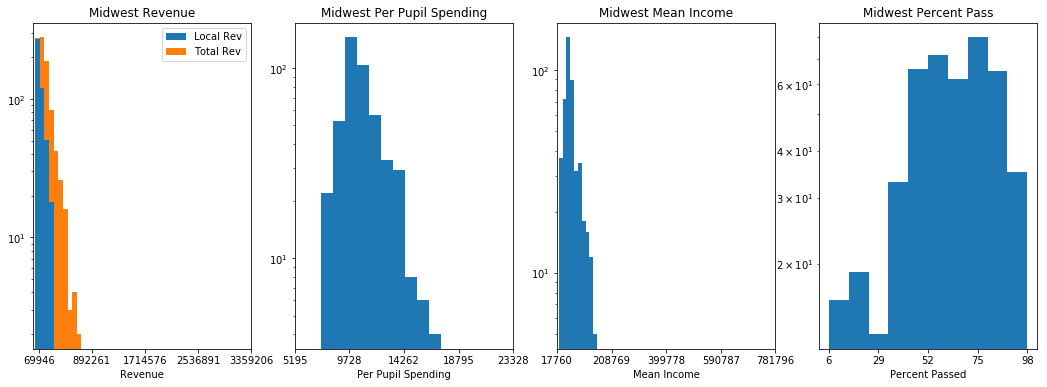

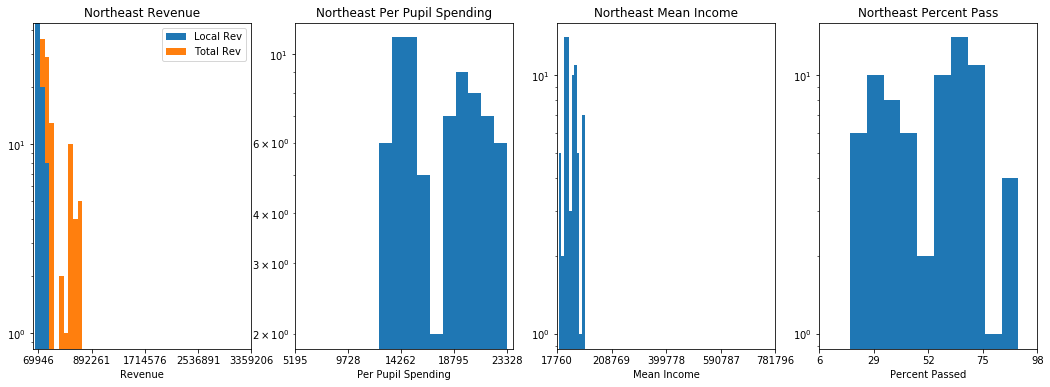

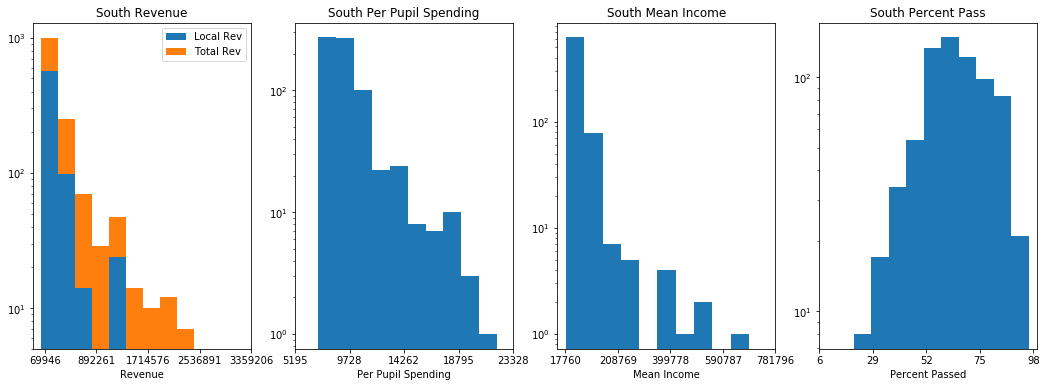

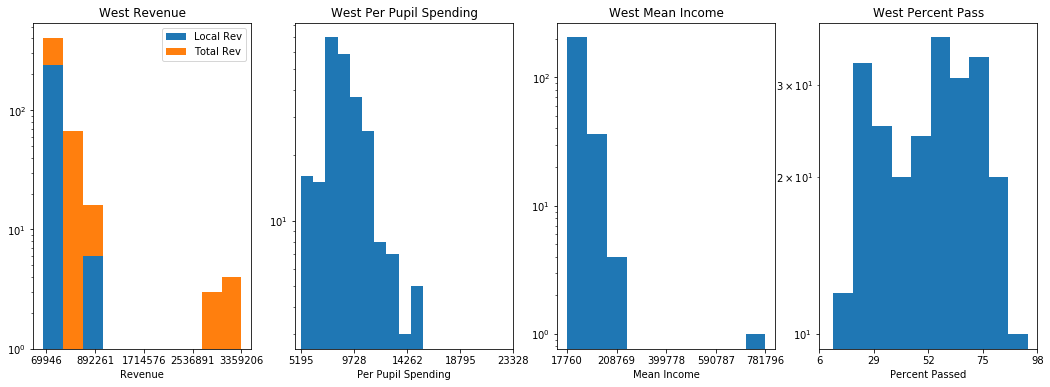

In [417]:
for name, group in schlev_data.groupby(['REGION']):
    fig, axes = plt.subplots(ncols=4)
    fig.set_size_inches(18, 6)    
    
    axes[0].hist(x=[group['TLOCREV'], group['TOTALREV']], log=True, stacked=True)
    axes[0].legend(['Local Rev', 'Total Rev'])
    axes[0].set_xticks(total_rev_ticks)
    axes[0].set_xlabel('Revenue')
    axes[0].set_title(f'{name} Revenue')
    
    axes[1].hist(x=group['PPCSTOT'], log=True)
    axes[1].set_title(f'{name} Per Pupil Spending')
    axes[1].set_xticks(pps_ticks)
    axes[1].set_xlabel('Per Pupil Spending')

    axes[2].hist(x=group['MEAN INCOME'], log=True)
    axes[2].set_title(f'{name} Mean Income')
    axes[2].set_xticks(mean_income_ticks)
    axes[2].set_xlabel('Mean Income')
    
    axes[3].hist(x=group['PCT_PASS'], log=True)
    axes[3].set_title(f'{name} Percent Pass')
    axes[3].set_xticks(pct_pass_ticks)
    axes[3].set_xlabel('Percent Passed')

The South and West regions have the greatest distribution in total revenue. However, the West region has a handful of outliers that have the greatest total revenue. Local revenue seems to encompass about half of of the total revenue for all regions except for the West and South regions which displays two different peaks in local revenue. Both the Northeast and West have to distinct peaks in the total revenue, but these do not align with the local revenue which indicates that this increased revenue in a subsample of the data is due to some other data source.

Per Pupil spending is right skewed for all regions except for the Northeast which has two distinct peaks. The South has the greatest distribution, and the Northeast has the highest per pupil spending out of all the regions.


The Midewest has a normal distribution of Mean Income. The Northeast has two or three peaks in the distribution. The South and West have right skewed distribution, but the West has a few outliers that make it so and reflect the distribution in Total Revenue. The Mean Income distributions seems to reflect the Total Revenue distributions.


The Midwest and the South have left skewed distributions in percent passed, but the South has a smaller distribution than the Midwest. The Northeast and West have two peaks in their distribution which may have to do with the distributions in Total Revenue and Mean Income.

In [418]:
schlev_data.groupby('DIVISION').describe()['TOTALREV']

count           mean            std       min        25%  \
DIVISION                                                                       
East North Central  352.0  214171.250000  101786.889240   75340.0  138585.25   
East South Central  133.0  242520.699248  198579.933107   82192.0  124808.00   
Middle Atlantic      72.0  319763.944444  200601.410375  104154.0  172630.75   
Mountain             62.0  622308.774194  900829.537574   99323.0  147495.00   
Pacific             184.0  290883.788043  158512.325495   86163.0  166882.00   
South Atlantic      489.0  497946.122699  547684.153192   69946.0  135980.00   
West North Central  109.0  237846.146789  136706.316135   75706.0  140602.00   
West South Central   96.0  296675.729167  134198.770826  142420.0  204447.50   

                         50%        75%        max  
DIVISION                                            
East North Central  185300.5  263213.00   729047.0  
East South Central  180014.0  281434.00  1272594.0  
Middle Atlantic     232968.0  533823.50   747268.0  
Mountain            310804.5  546980.75  3359206.0  
Pacific             253761.5  365781.75   815978.0  
South Atlantic      266079.0  587566.00  2710577.0  
West North Central  188700.0  297081.00   666255.0  
West South Central  241862.0  373153.25   625708.0

In [419]:
schlev_data.groupby('DIVISION').describe()['PCTLTOT']

count       mean        std   min     25%    50%     75%  \
DIVISION                                                                       
East North Central  352.0  40.762216  16.080393   8.2  29.250  36.55  49.450   
East South Central  133.0  39.492481  10.177996  22.1  30.200  38.60  48.300   
Middle Atlantic      72.0  40.323611  27.263350   6.8  10.575  41.50  67.550   
Mountain             62.0  29.838710  10.774490   8.7  21.850  29.35  34.275   
Pacific             184.0  33.208696  17.328672  12.5  19.175  28.60  38.900   
South Atlantic      489.0  47.168303  16.227049  18.6  36.400  43.10  56.100   
West North Central  109.0  42.130275  12.918975  13.6  32.100  41.40  51.900   
West South Central   96.0  41.522917  12.201566  21.4  32.225  41.80  48.200   

                     max  
DIVISION                  
East North Central  81.5  
East South Central  59.3  
Middle Atlantic     84.2  
Mountain            53.7  
Pacific             79.2  
South Atlantic      93.3  
West North Central  67.0  
West South Central  74.6

In [420]:
schlev_data.groupby('DIVISION').describe()['PPCSTOT']

count          mean          std      min       25%  \
DIVISION                                                                  
East North Central  352.0  11015.306818  1834.783401   7374.0   9687.50   
East South Central  133.0   8972.383459   964.950727   7129.0   8263.00   
Middle Atlantic      72.0  17667.861111  3271.937499  12352.0  14780.75   
Mountain             62.0   7485.596774  1340.608113   5195.0   6235.50   
Pacific             184.0   9501.690217  1801.534394   7159.0   8208.25   
South Atlantic      489.0   9545.044990  2412.638795   7485.0   8232.00   
West North Central  109.0  10088.651376   892.492996   7525.0   9573.00   
West South Central   96.0  10396.864583  1428.310910   8453.0   9535.00   

                        50%       75%      max  
DIVISION                                        
East North Central  10652.0  12102.75  17327.0  
East South Central   8822.0   9610.00  11147.0  
Middle Atlantic     18104.5  20444.75  23328.0  
Mountain             7380.0   8456.50  10653.0  
Pacific              8996.5  10431.25  15596.0  
South Atlantic       8723.0   9403.00  21974.0  
West North Central  10133.0  10645.00  12601.0  
West South Central  10176.5  10890.00  17588.0

In [421]:
schlev_data.groupby('DIVISION').describe()['MEAN INCOME']

count          mean           std      min       25%  \
DIVISION                                                                   
East North Central  352.0  66949.903409  27003.830779  23527.0  50569.25   
East South Central  133.0  68116.639098  27384.033661  20840.0  55569.00   
Middle Atlantic      72.0  66188.833333  22804.326102  22871.0  48453.50   
Mountain             62.0  82642.709677  93088.592932  20292.0  63185.25   
Pacific             184.0  77214.940217  30082.104384  17760.0  60054.75   
South Atlantic      489.0  76772.089980  59877.332315  24335.0  55506.00   
West North Central  109.0  68946.376147  26286.667976  23692.0  53771.00   
West South Central   96.0  64083.864583  17485.204061  26345.0  57841.75   

                        50%       75%       max  
DIVISION                                         
East North Central  59566.0  77373.25  151262.0  
East South Central  64013.0  76857.00  279092.0  
Middle Atlantic     65018.0  82116.00  114096.0  
Mountain            69775.5  75415.25  781796.0  
Pacific             71544.0  89060.50  194371.0  
South Atlantic      64904.0  76992.00  685559.0  
West North Central  63781.0  79673.00  157915.0  
West South Central  61649.5  66594.25  168031.0

In [422]:
schlev_data.groupby('DIVISION').describe()['PCT_PASS']

count       mean        std   min    25%    50%   75%  \
DIVISION                                                                    
East North Central  352.0  60.051136  21.120134   6.0  47.00  61.00  78.0   
East South Central  133.0  60.687970  18.834668  21.0  47.00  59.00  78.0   
Middle Atlantic      72.0  53.000000  19.123026  19.0  36.00  56.50  68.0   
Mountain             62.0  54.725806  21.454618  12.0  38.25  59.00  70.0   
Pacific             184.0  51.931289  20.474376  15.0  30.00  54.75  69.5   
South Atlantic      489.0  63.386503  13.204411  25.0  55.00  62.00  72.0   
West North Central  109.0  65.316514  19.857905  11.0  57.00  69.00  77.0   
West South Central   96.0  72.781250   8.652597  49.0  68.00  75.00  79.0   

                     max  
DIVISION                  
East North Central  95.0  
East South Central  91.0  
Middle Atlantic     90.0  
Mountain            94.0  
Pacific             92.0  
South Atlantic      96.0  
West North Central  98.0  
West South Central  91.0

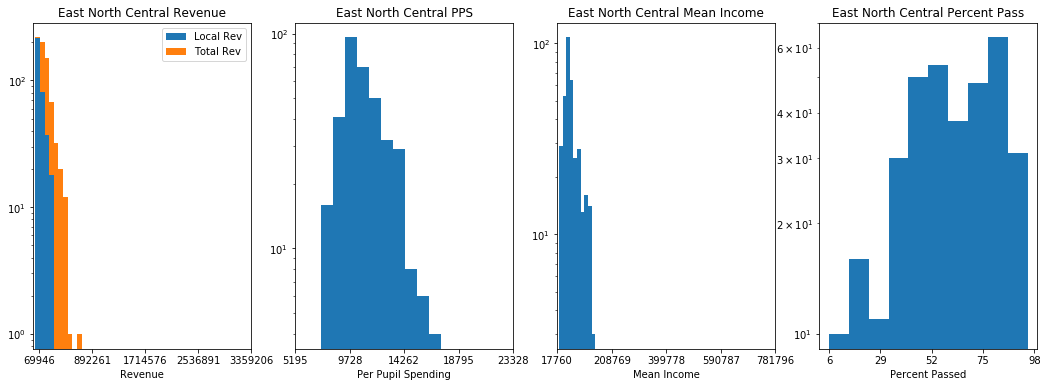

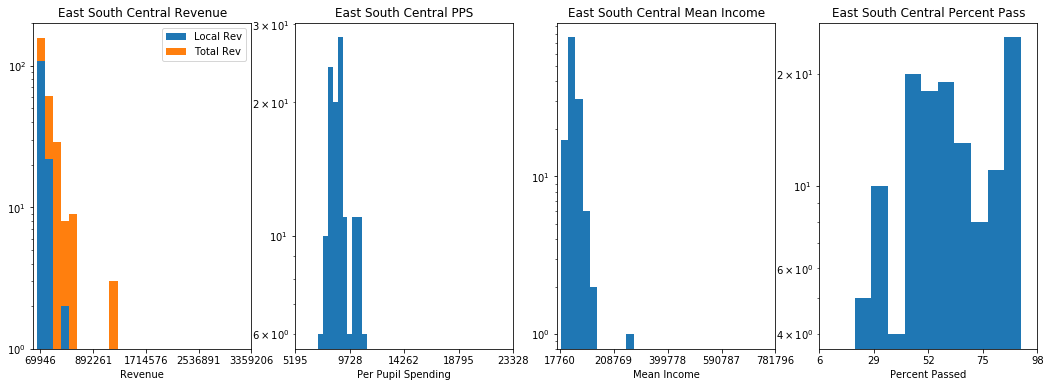

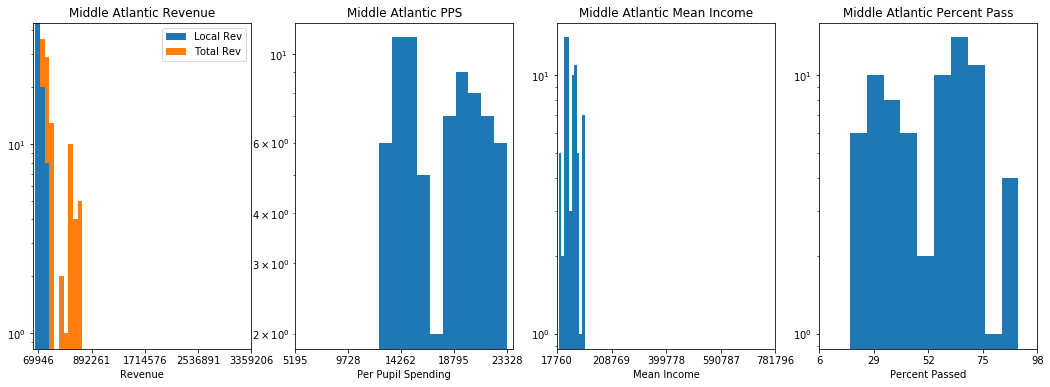

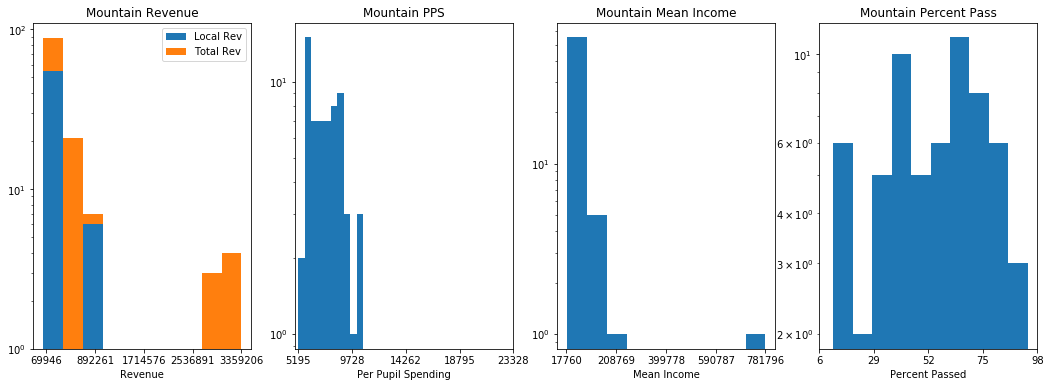

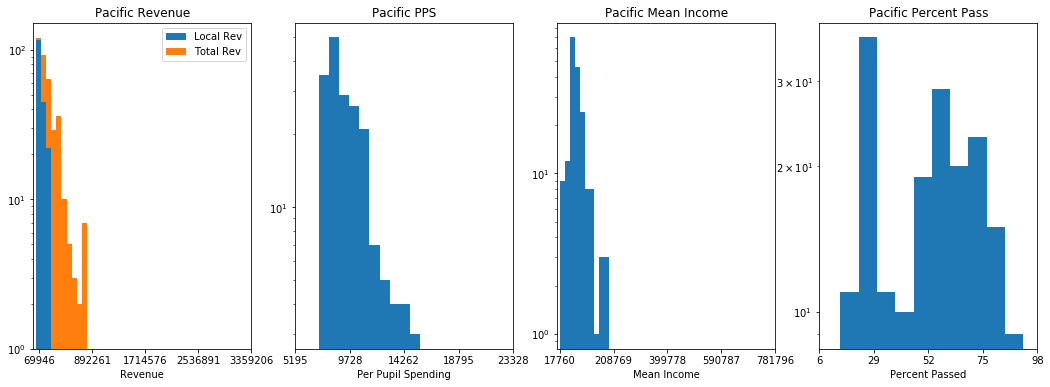

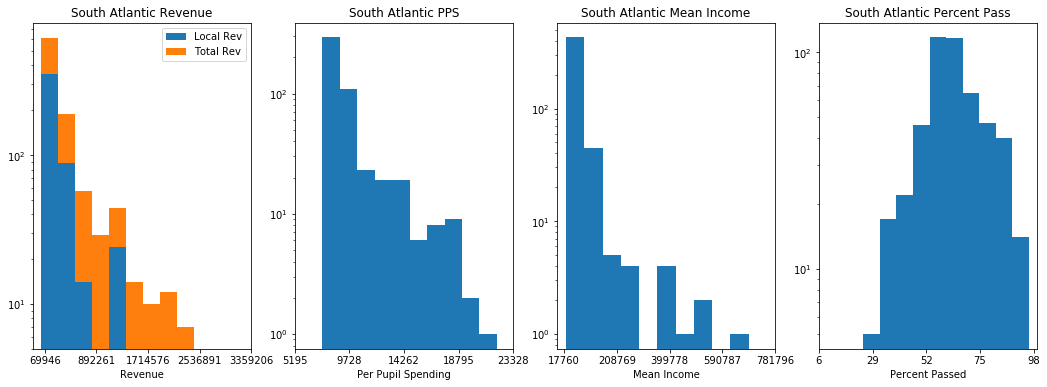

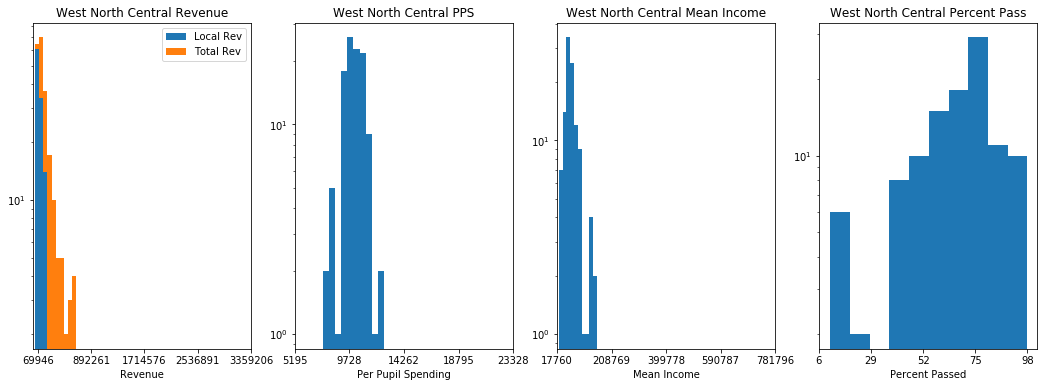

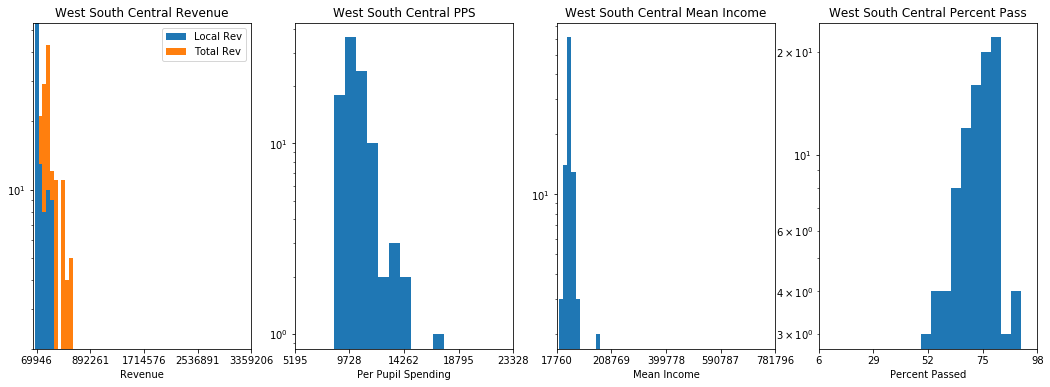

In [446]:
for name, group in schlev_data.groupby(['DIVISION']):
    fig, axes = plt.subplots(ncols=4)
    fig.set_size_inches(18, 6)    
    
    axes[0].hist(x=[group['TLOCREV'], group['TOTALREV']], log=True, stacked=True)
    axes[0].set_xticks(total_rev_ticks)
    axes[0].set_xlabel('Revenue')
    axes[0].legend(['Local Rev', 'Total Rev'])
    axes[0].set_title(f'{name} Revenue')

    axes[1].hist(x=group['PPCSTOT'], log=True)
    axes[1].set_xticks(pps_ticks)
    axes[1].set_xlabel('Per Pupil Spending')
    axes[1].set_title(f'{name} PPS')

    axes[2].hist(x=group['MEAN INCOME'], log=True)
    axes[2].set_xticks(mean_income_ticks)
    axes[2].set_xlabel('Mean Income')
    axes[2].set_title(f'{name} Mean Income')
    
    axes[3].hist(x=group['PCT_PASS'], log=True)
    axes[3].set_title(f'{name} Percent Pass')
    axes[3].set_xticks(pct_pass_ticks)
    axes[3].set_xlabel('Percent Passed')

In [424]:
local_rev = schlev_data['TLOCREV']
min_rev = local_rev.min()
max_rev = local_rev.max()
local_rev_ticks = np.linspace(int(min_rev), int(max_rev), 5)

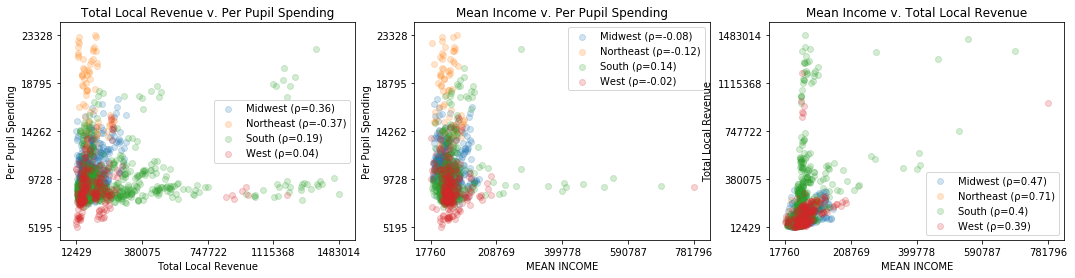

In [425]:
region_data = schlev_data.groupby(['REGION'])
fig, axes = plt.subplots(ncols=3)
fig.set_size_inches(18, 4)
for name, group in region_data:
    first_corr = round(group.corr().loc['TLOCREV', 'PPCSTOT'], 2)
    axes[0].scatter(x='TLOCREV', y='PPCSTOT', data=group, label=f'{name} (ρ={first_corr})', alpha=0.2)
    axes[0].set_xlabel('Total Local Revenue')
    axes[0].set_xticks(local_rev_ticks)
    axes[0].set_ylabel('Per Pupil Spending')
    axes[0].set_yticks(pps_ticks)
    axes[0].set_title('Total Local Revenue v. Per Pupil Spending')
    axes[0].legend()

    second_corr = round(group.corr().loc['MEAN INCOME', 'PPCSTOT'], 2)
    axes[1].scatter(x='MEAN INCOME', y='PPCSTOT', data=group, label=f'{name} (ρ={second_corr})', alpha=0.2)
    axes[1].set_xlabel('MEAN INCOME')
    axes[1].set_xticks(mean_income_ticks)
    axes[1].set_ylabel('Per Pupil Spending')
    axes[1].set_yticks(pps_ticks)
    axes[1].set_title('Mean Income v. Per Pupil Spending')
    axes[1].legend()

    third_corr = round(group.corr().loc['MEAN INCOME', 'TLOCREV'], 2)
    axes[2].scatter(x='MEAN INCOME', y='TLOCREV', data=group, label=f'{name} (ρ={third_corr})', alpha=0.2)
    axes[2].set_xlabel('MEAN INCOME')
    axes[2].set_xticks(mean_income_ticks)
    axes[2].set_ylabel('Total Local Revenue')
    axes[2].set_yticks(local_rev_ticks)
    axes[2].set_title('Mean Income v. Total Local Revenue')
    axes[2].legend()

The strongest positive correlation is between Mean Income and Total Local Revenue for the Northeast. For the other regions Mean Income is somwheat positively correlated with Total Local Revenue, but not as strongly.

In [426]:
schlev_data['INC_GRP'] = schlev_data['MEAN INCOME'].map(lambda x: 'LOW_INC' if x < 40200 else ('HIGH_INC' if x > 120500 else 'MID_INC'))
income_data = schlev_data.loc[schlev_data['INC_GRP'] != 'MID_INC'].groupby('INC_GRP')

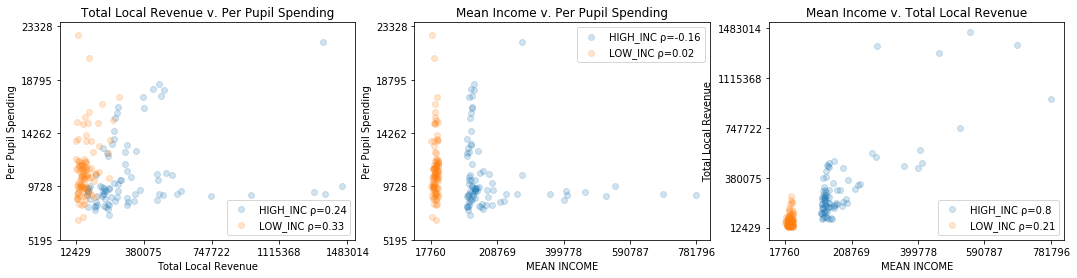

In [427]:
# https://www.census.gov/topics/income-poverty/poverty/guidance/poverty-measures.html#:~:text=The%20family's%202019%20poverty%20threshold%20(below)%20is%20%2431%2C275.
# low income approximately $35000
# https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system#:~:text=A%20family%20earning%20between%20%2432%2C048,more%20than%20%24373%2C894%20are%20rich.
# low income $40100
# upper income $120400
fig, axes = plt.subplots(ncols=3)
fig.set_size_inches(18, 4)
for name, group in income_data:
    first_corr = round(group.corr().loc['TLOCREV', 'PPCSTOT'], 2)
    axes[0].scatter(x='TLOCREV', y='PPCSTOT', data=group, label=f'{name} ρ={first_corr}', alpha=0.2)
    axes[0].set_xlabel('Total Local Revenue')
    axes[0].set_xticks(local_rev_ticks)
    axes[0].set_ylabel('Per Pupil Spending')
    axes[0].set_yticks(pps_ticks)
    axes[0].set_title('Total Local Revenue v. Per Pupil Spending')
    axes[0].legend()

    second_corr = round(group.corr().loc['MEAN INCOME', 'PPCSTOT'], 2)
    axes[1].scatter(x='MEAN INCOME', y='PPCSTOT', data=group, label=f'{name} ρ={second_corr}', alpha=0.2)
    axes[1].set_xlabel('MEAN INCOME')
    axes[1].set_xticks(mean_income_ticks)
    axes[1].set_ylabel('Per Pupil Spending')
    axes[1].set_yticks(pps_ticks)
    axes[1].set_title('Mean Income v. Per Pupil Spending')
    axes[1].legend()

    third_corr = round(group.corr().loc['MEAN INCOME', 'TLOCREV'], 2)
    axes[2].scatter(x='MEAN INCOME', y='TLOCREV', data=group, label=f'{name} ρ={third_corr}', alpha=0.2)
    axes[2].set_xlabel('MEAN INCOME')
    axes[2].set_xticks(mean_income_ticks)
    axes[2].set_ylabel('Total Local Revenue')
    axes[2].set_yticks(local_rev_ticks)
    axes[2].set_title('Mean Income v. Total Local Revenue')
    axes[2].legend()

It seems that the previous correlation may be attributed to a difference between low and high income households. A high income household had a .8 positive correlation with total local revenue, but the correlation for low income household was nowhere near as close.

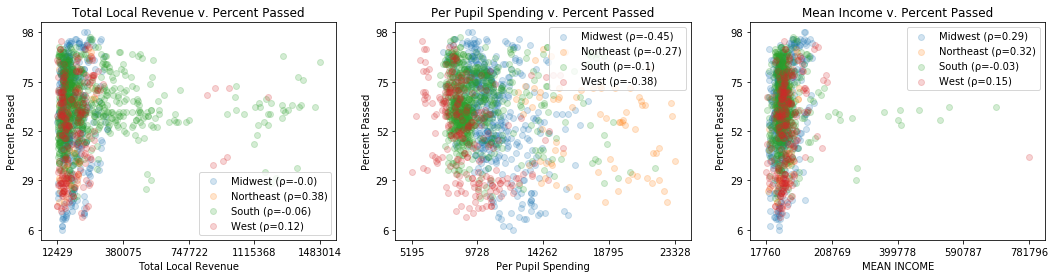

In [428]:
region_data = schlev_data.groupby(['REGION'])
fig, axes = plt.subplots(ncols=3)
fig.set_size_inches(18, 4)
for name, group in region_data:
    first_corr = round(group.corr().loc['TLOCREV', 'PCT_PASS'], 2)
    axes[0].scatter(x='TLOCREV', y='PCT_PASS', data=group, label=f'{name} (ρ={first_corr})', alpha=0.2)
    axes[0].set_xlabel('Total Local Revenue')
    axes[0].set_xticks(local_rev_ticks)
    axes[0].set_ylabel('Percent Passed')
    axes[0].set_yticks(pct_pass_ticks)
    axes[0].set_title('Total Local Revenue v. Percent Passed')
    axes[0].legend()

    second_corr = round(group.corr().loc['PPCSTOT', 'PCT_PASS'], 2)
    axes[1].scatter(x='PPCSTOT', y='PCT_PASS', data=group, label=f'{name} (ρ={second_corr})', alpha=0.2)
    axes[1].set_xlabel('Per Pupil Spending')
    axes[1].set_xticks(pps_ticks)
    axes[1].set_ylabel('Percent Passed')
    axes[1].set_yticks(pct_pass_ticks)
    axes[1].set_title('Per Pupil Spending v. Percent Passed')
    axes[1].legend()

    third_corr = round(group.corr().loc['MEAN INCOME', 'PCT_PASS'], 2)
    axes[2].scatter(x='MEAN INCOME', y='PCT_PASS', data=group, label=f'{name} (ρ={third_corr})', alpha=0.2)
    axes[2].set_xlabel('MEAN INCOME')
    axes[2].set_xticks(mean_income_ticks)
    axes[2].set_ylabel('Percent Passed')
    axes[2].set_yticks(pct_pass_ticks)
    axes[2].set_title('Mean Income v. Percent Passed')
    axes[2].legend()

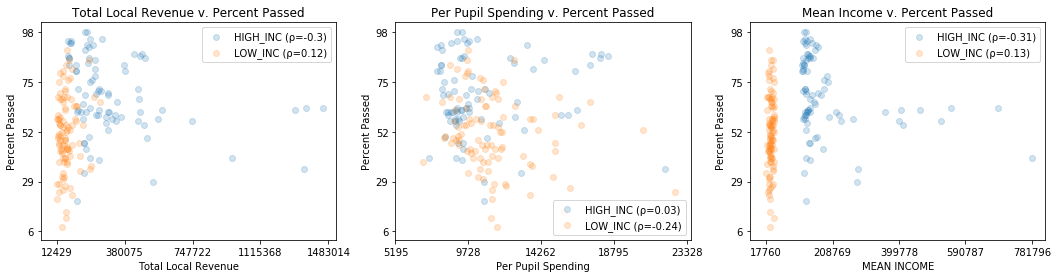

In [429]:
region_data = schlev_data.groupby(['REGION'])
fig, axes = plt.subplots(ncols=3)
fig.set_size_inches(18, 4)
for name, group in income_data:
    first_corr = round(group.corr().loc['TLOCREV', 'PCT_PASS'], 2)
    axes[0].scatter(x='TLOCREV', y='PCT_PASS', data=group, label=f'{name} (ρ={first_corr})', alpha=0.2)
    axes[0].set_xlabel('Total Local Revenue')
    axes[0].set_xticks(local_rev_ticks)
    axes[0].set_ylabel('Percent Passed')
    axes[0].set_yticks(pct_pass_ticks)
    axes[0].set_title('Total Local Revenue v. Percent Passed')
    axes[0].legend()

    second_corr = round(group.corr().loc['PPCSTOT', 'PCT_PASS'], 2)
    axes[1].scatter(x='PPCSTOT', y='PCT_PASS', data=group, label=f'{name} (ρ={second_corr})', alpha=0.2)
    axes[1].set_xlabel('Per Pupil Spending')
    axes[1].set_xticks(pps_ticks)
    axes[1].set_ylabel('Percent Passed')
    axes[1].set_yticks(pct_pass_ticks)
    axes[1].set_title('Per Pupil Spending v. Percent Passed')
    axes[1].legend()

    third_corr = round(group.corr().loc['MEAN INCOME', 'PCT_PASS'], 2)
    axes[2].scatter(x='MEAN INCOME', y='PCT_PASS', data=group, label=f'{name} (ρ={third_corr})', alpha=0.2)
    axes[2].set_xlabel('MEAN INCOME')
    axes[2].set_xticks(mean_income_ticks)
    axes[2].set_ylabel('Percent Passed')
    axes[2].set_yticks(pct_pass_ticks)
    axes[2].set_title('Mean Income v. Percent Passed')
    axes[2].legend()

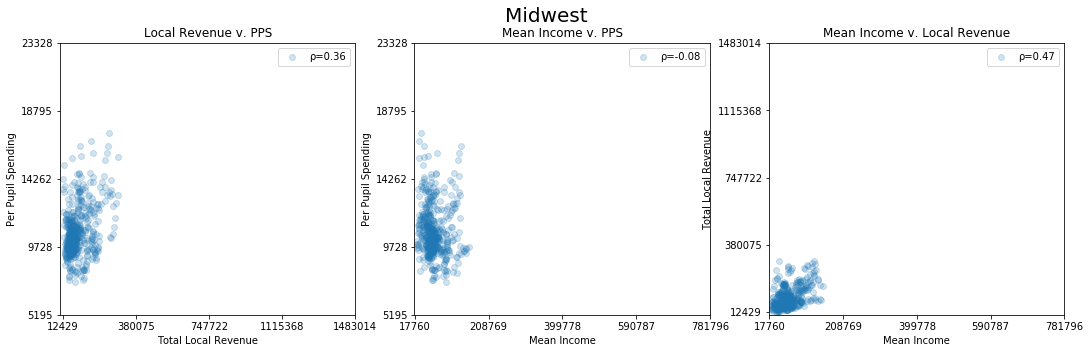

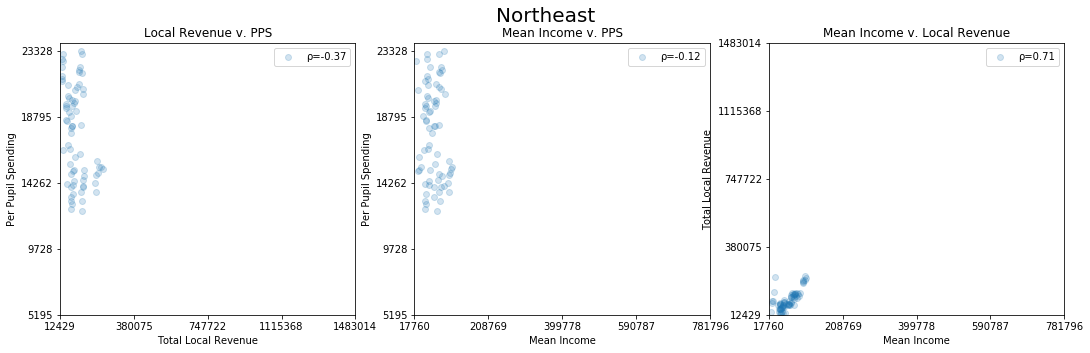

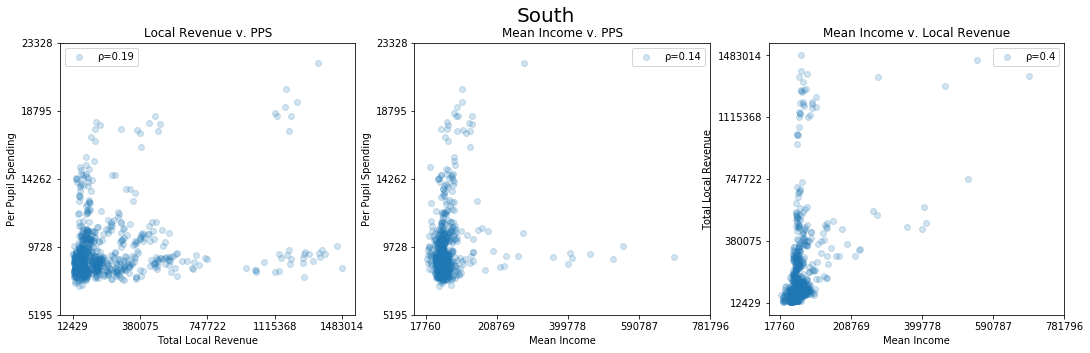

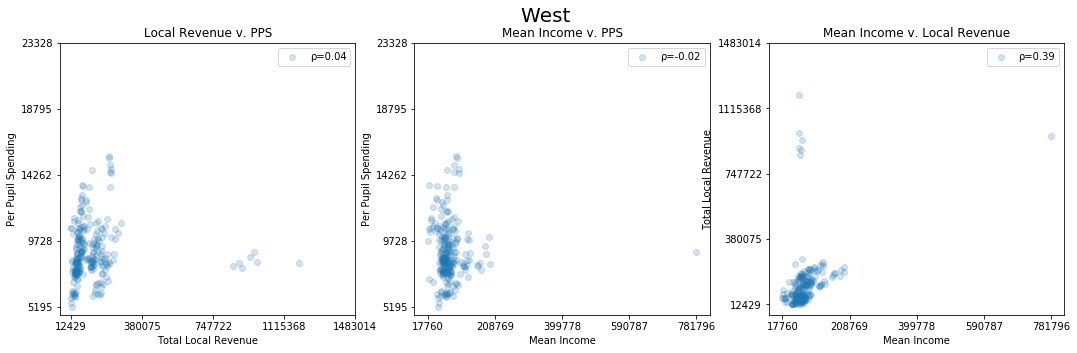

In [430]:
for name, group in region_data:
    mean_income = group['MEAN INCOME']
    local_rev = group['TLOCREV']
    per_pupil_spending = group['PPCSTOT']

    fig, axes = plt.subplots(ncols=3, nrows=1)
    fig.set_size_inches(18, 5)
    fig.suptitle(name, fontsize=20)

    first_corr = round(group.corr().loc['TLOCREV', 'PPCSTOT'], 2)
    axes[0].scatter(x=local_rev, y=per_pupil_spending, alpha=0.2)
    axes[0].set_xlabel('Total Local Revenue')
    axes[0].set_xticks(local_rev_ticks)
    axes[0].set_ylabel('Per Pupil Spending')
    axes[0].set_yticks(pps_ticks)
    axes[0].set_title('Local Revenue v. PPS')
    axes[0].legend([f'ρ={first_corr}'])

    second_corr = round(group.corr().loc['MEAN INCOME', 'PPCSTOT'], 2)
    axes[1].scatter(x=mean_income, y=per_pupil_spending, alpha=0.2)
    axes[1].set_xlabel('Mean Income')
    axes[1].set_xticks(mean_income_ticks)
    axes[1].set_ylabel('Per Pupil Spending')
    axes[1].set_yticks(pps_ticks)
    axes[1].set_title('Mean Income v. PPS')
    axes[1].legend([f'ρ={second_corr}'])

    third_corr = round(group.corr().loc['MEAN INCOME', 'TLOCREV'], 2)
    axes[2].scatter(x=mean_income, y=local_rev, alpha=0.2)
    axes[2].set_xlabel('Mean Income')
    axes[2].set_xticks(mean_income_ticks)
    axes[2].set_ylabel('Total Local Revenue')
    axes[2].set_yticks(local_rev_ticks)
    axes[2].set_title('Mean Income v. Local Revenue')
    axes[2].legend([f'ρ={third_corr}'])

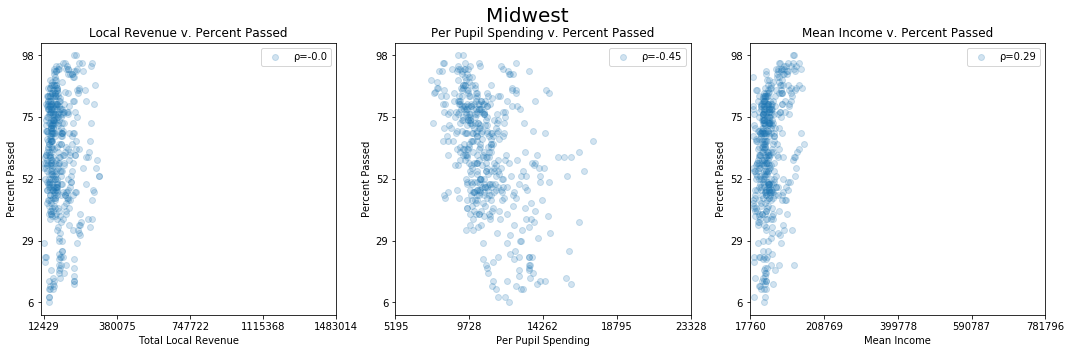

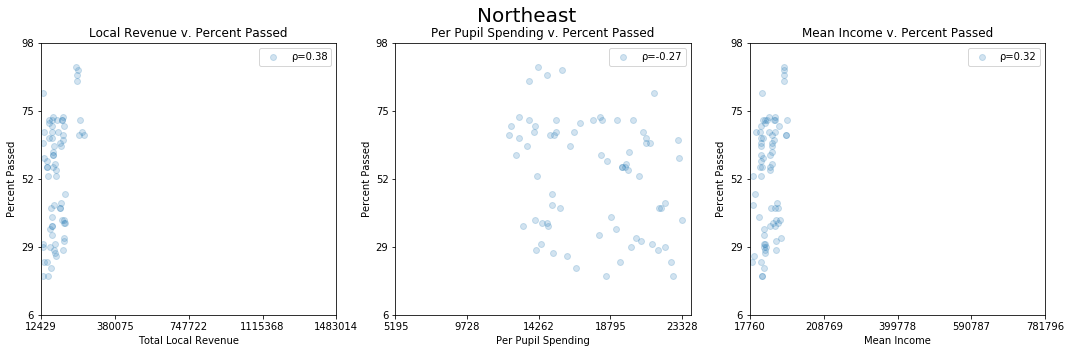

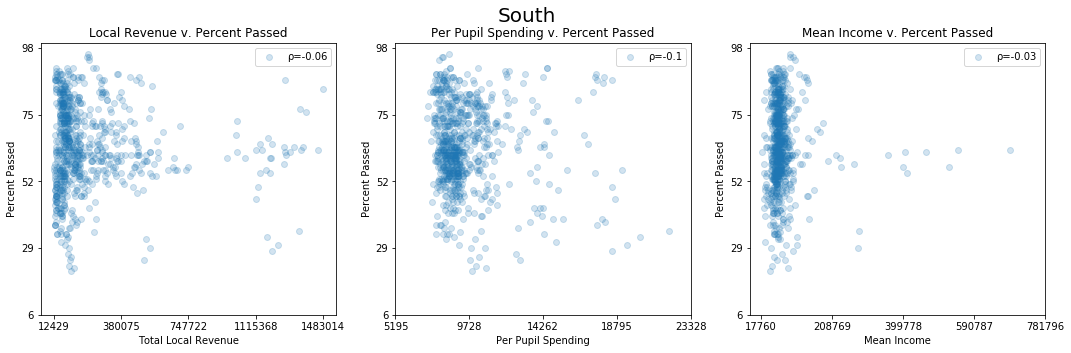

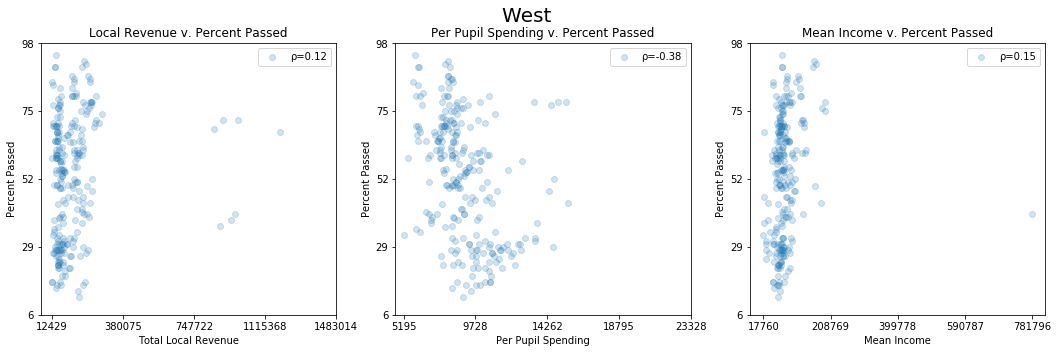

In [431]:
for name, group in region_data:
    mean_income = group['MEAN INCOME']
    local_rev = group['TLOCREV']
    per_pupil_spending = group['PPCSTOT']
    percent_passed = group['PCT_PASS']

    fig, axes = plt.subplots(ncols=3, nrows=1)
    fig.set_size_inches(18, 5)
    fig.suptitle(name, fontsize=20)

    first_corr = round(group.corr().loc['TLOCREV', 'PCT_PASS'], 2)
    axes[0].scatter(x=local_rev, y=percent_passed, alpha=0.2)
    axes[0].set_xlabel('Total Local Revenue')
    axes[0].set_xticks(local_rev_ticks)
    axes[0].set_ylabel('Percent Passed')
    axes[0].set_yticks(pct_pass_ticks)
    axes[0].set_title('Local Revenue v. Percent Passed')
    axes[0].legend([f'ρ={first_corr}'])

    second_corr = round(group.corr().loc['PPCSTOT', 'PCT_PASS'], 2)
    axes[1].scatter(x=per_pupil_spending, y=percent_passed, alpha=0.2)
    axes[1].set_xlabel('Per Pupil Spending')
    axes[1].set_xticks(pps_ticks)
    axes[1].set_ylabel('Percent Passed')
    axes[1].set_yticks(pct_pass_ticks)
    axes[1].set_title('Per Pupil Spending v. Percent Passed')
    axes[1].legend([f'ρ={second_corr}'])

    third_corr = round(group.corr().loc['MEAN INCOME', 'PCT_PASS'], 2)
    axes[2].scatter(x=mean_income, y=percent_passed, alpha=0.2)
    axes[2].set_xlabel('Mean Income')
    axes[2].set_xticks(mean_income_ticks)
    axes[2].set_ylabel('Percent Passed')
    axes[2].set_yticks(pct_pass_ticks)
    axes[2].set_title('Mean Income v. Percent Passed')
    axes[2].legend([f'ρ={third_corr}'])

Per Pupil spending seems oddly slightly negatively correlated with Percent Passed rather than positvely correlated. There must be some other factor that is contributing to this.

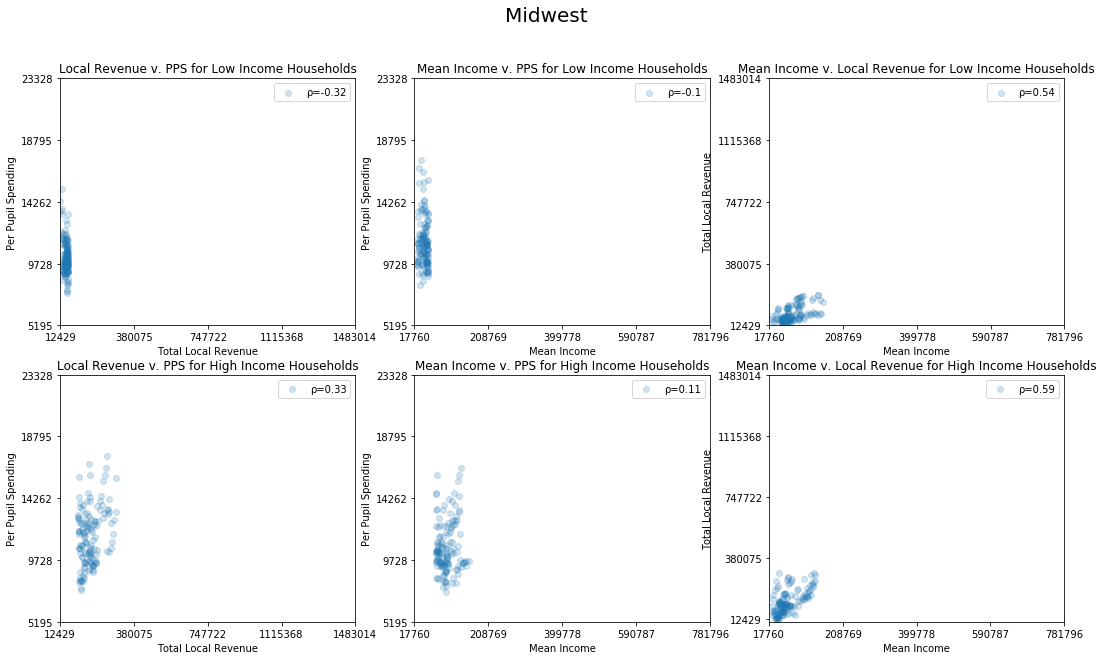

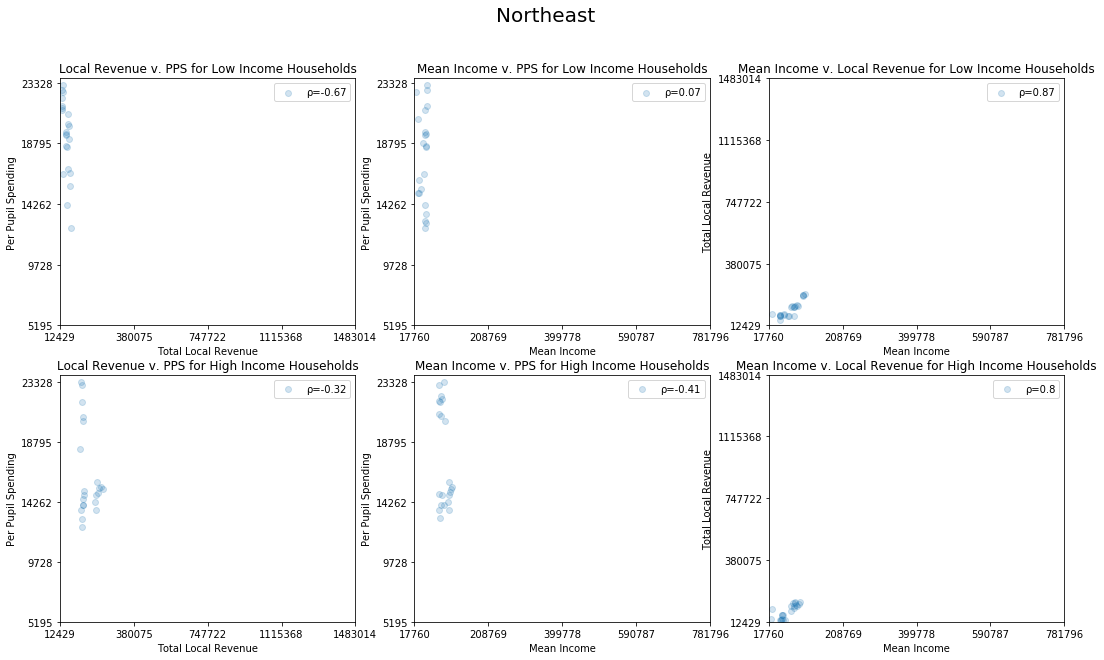

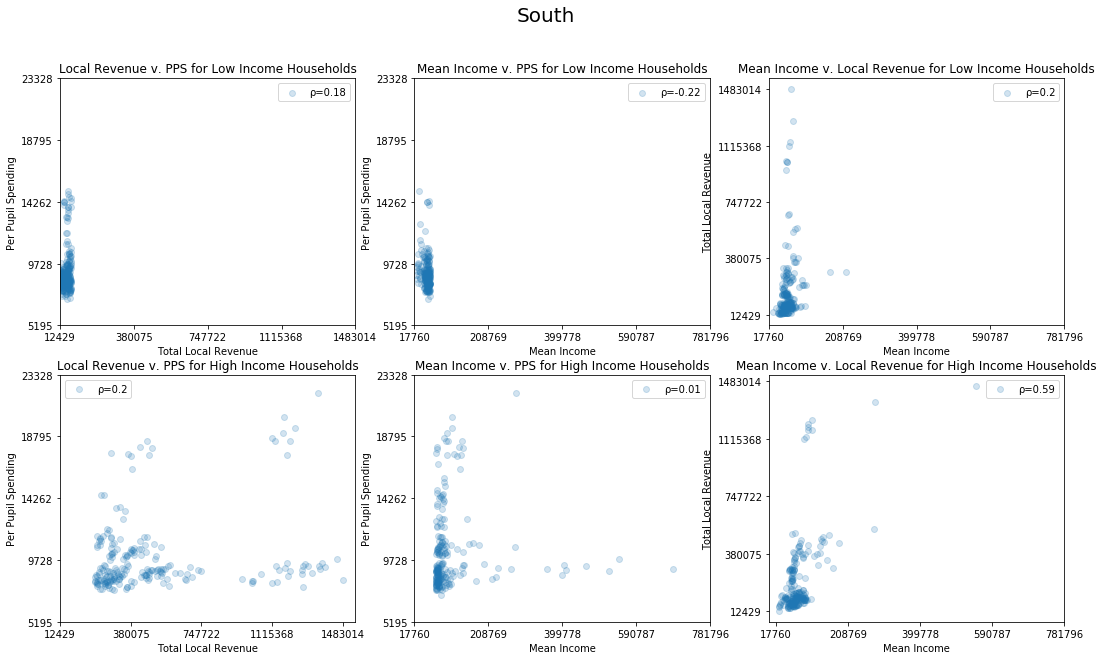

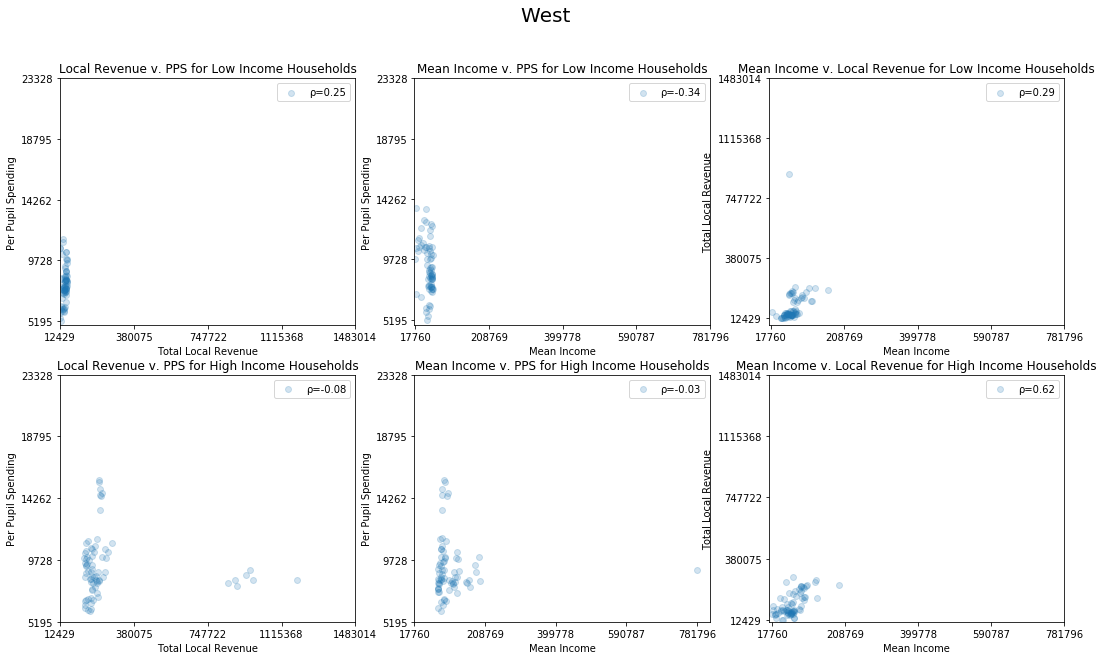

In [432]:
for name, group in region_data:
    low_quantile = .3
    high_quantile = .7

    mean_income = group['MEAN INCOME']
    min_income = mean_income.min()
    max_income = mean_income.max()
    low_income_qtl = mean_income.quantile(q=low_quantile)
    high_income_qtl = mean_income.quantile(q=high_quantile)
    low_income_grp = group[mean_income < low_income_qtl]
    high_income_grp = group[mean_income > high_income_qtl]

    local_rev = group['TLOCREV']
    min_rev = local_rev.min()
    max_rev = local_rev.max()
    low_rev_qtl = local_rev.quantile(q=low_quantile)
    high_rev_qtl = local_rev.quantile(q=high_quantile)
    low_rev_grp = group[local_rev < low_rev_qtl]
    high_rev_grp = group[local_rev > high_rev_qtl]
    
    per_pupil_spending = group['PPCSTOT']
    min_pps = per_pupil_spending.min()
    min_pps = per_pupil_spending.max()
    low_pps_qtl = per_pupil_spending.quantile(q=low_quantile)
    high_pps_qtl = per_pupil_spending.quantile(q=high_quantile)
    low_pps_grp = group[per_pupil_spending < low_pps_qtl]
    high_pps_grp = group[per_pupil_spending > high_pps_qtl]

    fig, axes = plt.subplots(ncols=3, nrows=2)
    fig.set_size_inches(18, 10)
    fig.suptitle(name, fontsize=20)

    first_corr = round(low_rev_grp.corr().loc['TLOCREV', 'PPCSTOT'], 2)
    axes[0][0].scatter(x=low_rev_grp['TLOCREV'], y=low_rev_grp['PPCSTOT'], alpha=0.2)
    axes[0][0].set_xlabel('Total Local Revenue')
    axes[0][0].set_xticks(local_rev_ticks)
    axes[0][0].set_ylabel('Per Pupil Spending')
    axes[0][0].set_yticks(pps_ticks)
    axes[0][0].set_title('Local Revenue v. PPS for Low Income Households')
    axes[0][0].legend([f'ρ={first_corr}'])

    second_corr = round(low_income_grp.corr().loc['MEAN INCOME', 'PPCSTOT'], 2)
    axes[0][1].scatter(x=low_income_grp['MEAN INCOME'], y=low_income_grp['PPCSTOT'], alpha=0.2)
    axes[0][1].set_xlabel('Mean Income')
    axes[0][1].set_xticks(mean_income_ticks)
    axes[0][1].set_ylabel('Per Pupil Spending')
    axes[0][1].set_yticks(pps_ticks)
    axes[0][1].set_title('Mean Income v. PPS for Low Income Households')
    axes[0][1].legend([f'ρ={second_corr}'])

    third_corr = round(low_pps_grp.corr().loc['MEAN INCOME', 'TLOCREV'], 2)
    axes[0][2].scatter(x=low_pps_grp['MEAN INCOME'], y=low_pps_grp['TLOCREV'], alpha=0.2)
    axes[0][2].set_xlabel('Mean Income')
    axes[0][2].set_xticks(mean_income_ticks)
    axes[0][2].set_ylabel('Total Local Revenue')
    axes[0][2].set_yticks(local_rev_ticks)
    axes[0][2].set_title('Mean Income v. Local Revenue for Low Income Households')
    axes[0][2].legend([f'ρ={third_corr}'])
    
    fourth_corr = round(high_rev_grp.corr().loc['TLOCREV', 'PPCSTOT'], 2)
    axes[1][0].scatter(x=high_rev_grp['TLOCREV'], y=high_rev_grp['PPCSTOT'], alpha=0.2)
    axes[1][0].set_xlabel('Total Local Revenue')
    axes[1][0].set_xticks(local_rev_ticks)
    axes[1][0].set_ylabel('Per Pupil Spending')
    axes[1][0].set_yticks(pps_ticks)
    axes[1][0].set_title('Local Revenue v. PPS for High Income Households')
    axes[1][0].legend([f'ρ={fourth_corr}'])

    fifth_corr = round(high_income_grp.corr().loc['MEAN INCOME', 'PPCSTOT'], 2)
    axes[1][1].scatter(x=high_income_grp['MEAN INCOME'], y=high_income_grp['PPCSTOT'], alpha=0.2)
    axes[1][1].set_xlabel('Mean Income')
    axes[1][1].set_xticks(mean_income_ticks)
    axes[1][1].set_ylabel('Per Pupil Spending')
    axes[1][1].set_yticks(pps_ticks)
    axes[1][1].set_title('Mean Income v. PPS for High Income Households')
    axes[1][1].legend([f'ρ={fifth_corr}'])

    sixth_corr = round(high_pps_grp.corr().loc['MEAN INCOME', 'TLOCREV'], 2)
    axes[1][2].scatter(x=high_pps_grp['MEAN INCOME'], y=high_pps_grp['TLOCREV'], alpha=0.2)
    axes[1][2].set_xlabel('Mean Income')
    axes[1][2].set_xticks(mean_income_ticks)
    axes[1][2].set_ylabel('Total Local Revenue')
    axes[1][2].set_yticks(local_rev_ticks)
    axes[1][2].set_title('Mean Income v. Local Revenue for High Income Households')
    axes[1][2].legend([f'ρ={sixth_corr}'])

Mean Income and Local Revenue is somewhat positively correlated for low income households but strongly correlated for high income households in  the South and West. The correlations for low and high income households are practically equal and strongly positively correlated the Northeast and Midwest. This seems to indicate that the school districts in low income neighborhoods in South and West must get their revenue from other sources, possbily state and federal.

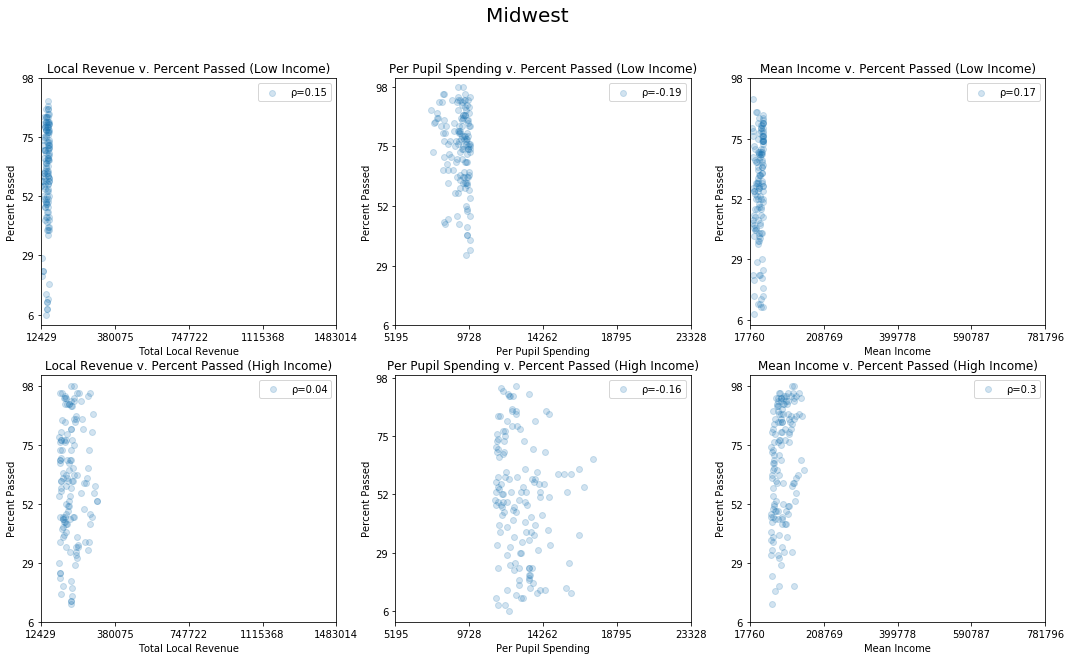

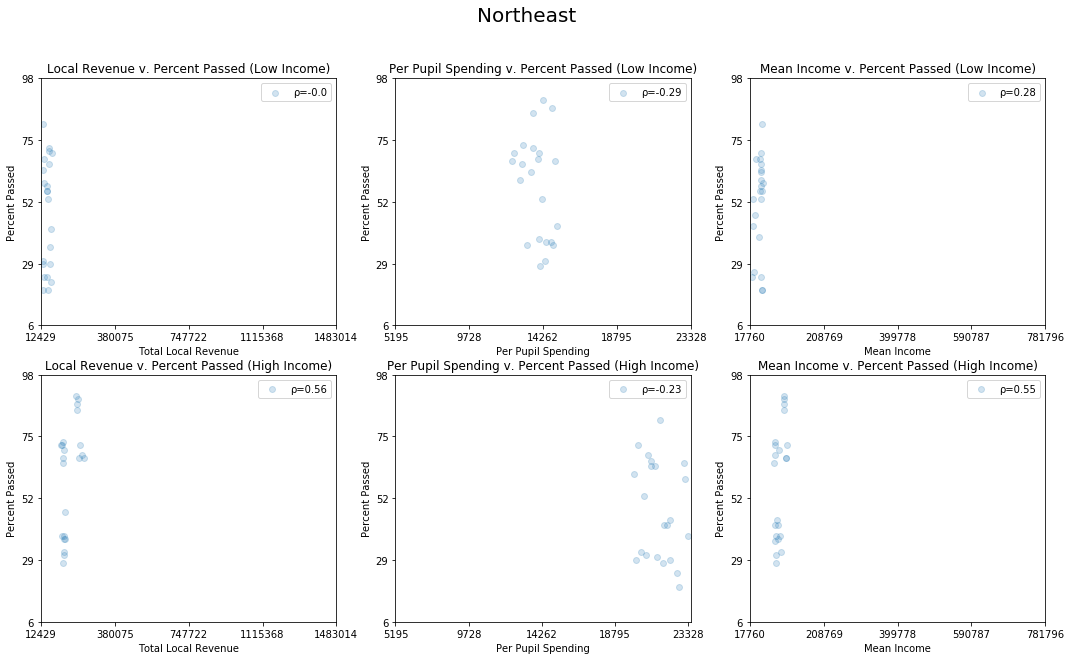

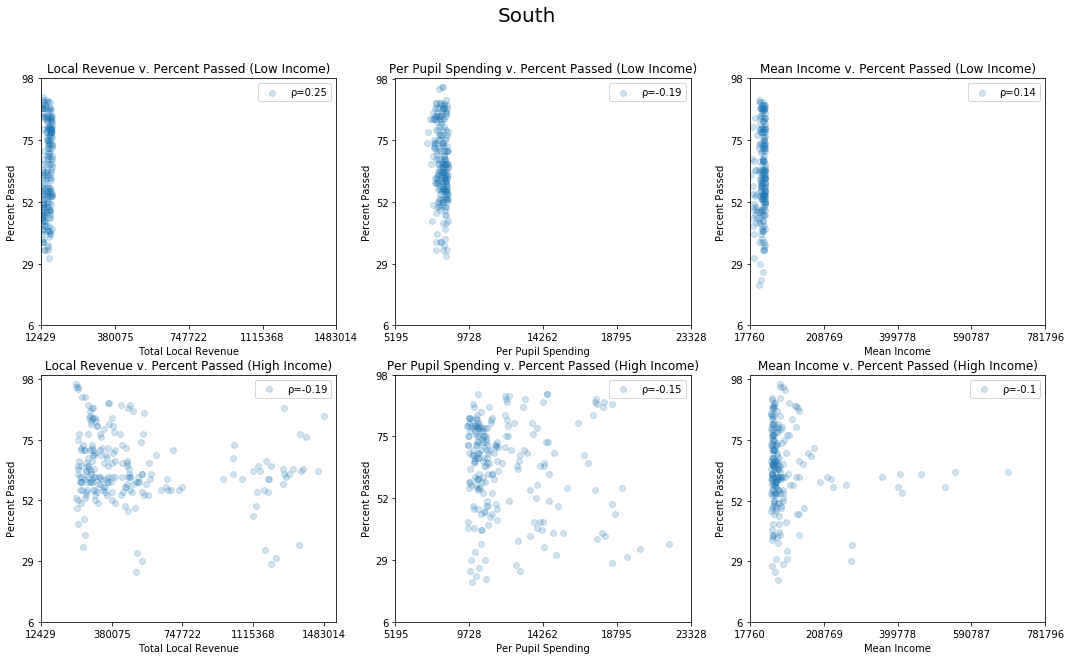

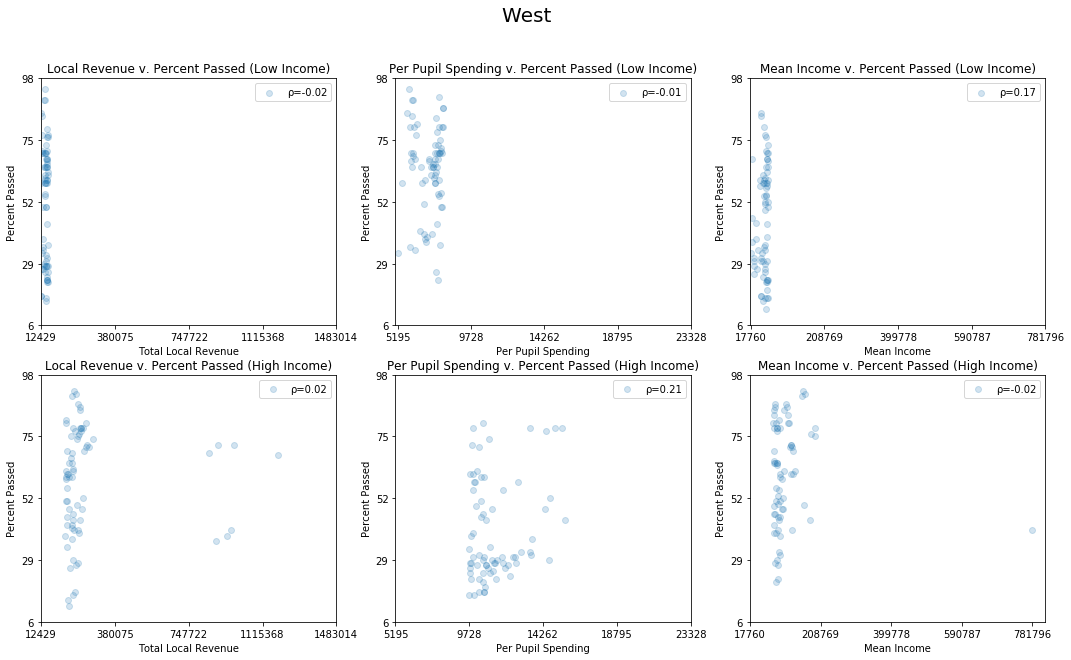

In [433]:
for name, group in region_data:
    low_quantile = .3
    high_quantile = .7

    mean_income = group['MEAN INCOME']
    min_income = mean_income.min()
    max_income = mean_income.max()
    low_income_qtl = mean_income.quantile(q=low_quantile)
    high_income_qtl = mean_income.quantile(q=high_quantile)
    low_income_grp = group[mean_income < low_income_qtl]
    high_income_grp = group[mean_income > high_income_qtl]

    local_rev = group['TLOCREV']
    min_rev = local_rev.min()
    max_rev = local_rev.max()
    low_rev_qtl = local_rev.quantile(q=low_quantile)
    high_rev_qtl = local_rev.quantile(q=high_quantile)
    low_rev_grp = group[local_rev < low_rev_qtl]
    high_rev_grp = group[local_rev > high_rev_qtl]
    
    per_pupil_spending = group['PPCSTOT']
    min_pps = per_pupil_spending.min()
    min_pps = per_pupil_spending.max()
    low_pps_qtl = per_pupil_spending.quantile(q=low_quantile)
    high_pps_qtl = per_pupil_spending.quantile(q=high_quantile)
    low_pps_grp = group[per_pupil_spending < low_pps_qtl]
    high_pps_grp = group[per_pupil_spending > high_pps_qtl]
    
    fig, axes = plt.subplots(ncols=3, nrows=2)
    fig.set_size_inches(18, 10)
    fig.suptitle(name, fontsize=20)

    first_corr = round(low_rev_grp.corr().loc['TLOCREV', 'PCT_PASS'], 2)
    axes[0][0].scatter(x=low_rev_grp['TLOCREV'], y=low_rev_grp['PCT_PASS'], alpha=0.2)
    axes[0][0].set_xlabel('Total Local Revenue')
    axes[0][0].set_xticks(local_rev_ticks)
    axes[0][0].set_ylabel('Percent Passed')
    axes[0][0].set_yticks(pct_pass_ticks)
    axes[0][0].set_title('Local Revenue v. Percent Passed (Low Income)')
    axes[0][0].legend([f'ρ={first_corr}'])

    second_corr = round(low_pps_grp.corr().loc['PPCSTOT', 'PCT_PASS'], 2)
    axes[0][1].scatter(x=low_pps_grp['PPCSTOT'], y=low_pps_grp['PCT_PASS'], alpha=0.2)
    axes[0][1].set_xlabel('Per Pupil Spending')
    axes[0][1].set_xticks(pps_ticks)
    axes[0][1].set_ylabel('Percent Passed')
    axes[0][1].set_yticks(pct_pass_ticks)
    axes[0][1].set_title('Per Pupil Spending v. Percent Passed (Low Income)')
    axes[0][1].legend([f'ρ={second_corr}'])

    third_corr = round(low_income_grp.corr().loc['MEAN INCOME', 'PCT_PASS'], 2)
    axes[0][2].scatter(x=low_income_grp['MEAN INCOME'], y=low_income_grp['PCT_PASS'], alpha=0.2)
    axes[0][2].set_xlabel('Mean Income')
    axes[0][2].set_xticks(mean_income_ticks)
    axes[0][2].set_ylabel('Percent Passed')
    axes[0][2].set_yticks(pct_pass_ticks)
    axes[0][2].set_title('Mean Income v. Percent Passed (Low Income)')
    axes[0][2].legend([f'ρ={third_corr}'])
    
    fourth_corr = round(high_rev_grp.corr().loc['TLOCREV', 'PCT_PASS'], 2)
    axes[1][0].scatter(x=high_rev_grp['TLOCREV'], y=high_rev_grp['PCT_PASS'], alpha=0.2)
    axes[1][0].set_xlabel('Total Local Revenue')
    axes[1][0].set_xticks(local_rev_ticks)
    axes[1][0].set_ylabel('Percent Passed')
    axes[1][0].set_yticks(pct_pass_ticks)
    axes[1][0].set_title('Local Revenue v. Percent Passed (High Income)')
    axes[1][0].legend([f'ρ={fourth_corr}'])

    fifth_corr = round(high_pps_grp.corr().loc['PPCSTOT', 'PCT_PASS'], 2)
    axes[1][1].scatter(x=high_pps_grp['PPCSTOT'], y=high_pps_grp['PCT_PASS'], alpha=0.2)
    axes[1][1].set_xlabel('Per Pupil Spending')
    axes[1][1].set_xticks(pps_ticks)
    axes[1][1].set_ylabel('Percent Passed')
    axes[1][1].set_yticks(pct_pass_ticks)
    axes[1][1].set_title('Per Pupil Spending v. Percent Passed (High Income)')
    axes[1][1].legend([f'ρ={fifth_corr}'])

    sixth_corr = round(high_income_grp.corr().loc['MEAN INCOME', 'PCT_PASS'], 2)
    axes[1][2].scatter(x=high_income_grp['MEAN INCOME'], y=high_income_grp['PCT_PASS'], alpha=0.2)
    axes[1][2].set_xlabel('Mean Income')
    axes[1][2].set_xticks(mean_income_ticks)
    axes[1][2].set_ylabel('Percent Passed')
    axes[1][2].set_yticks(pct_pass_ticks)
    axes[1][2].set_title('Mean Income v. Percent Passed (High Income)')
    axes[1][2].legend([f'ρ={sixth_corr}'])

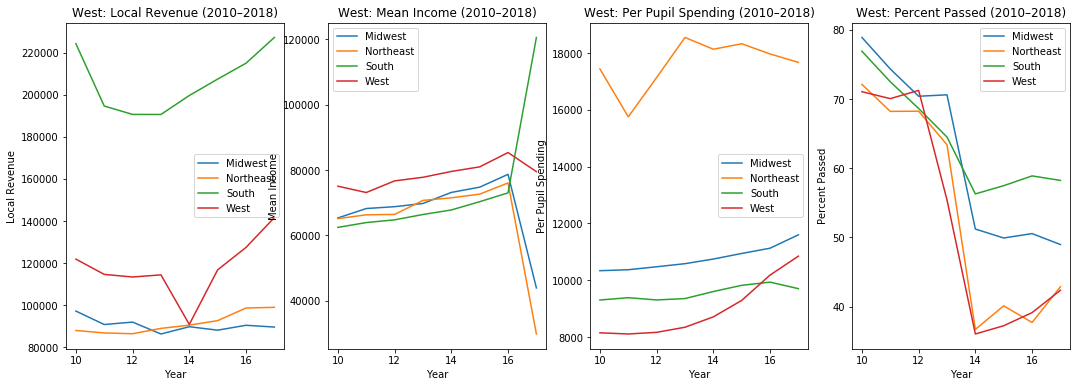

In [434]:
fig, axes = plt.subplots(ncols=4)
fig.set_size_inches(18, 6)
region_data_by_year = schlev_data.groupby(['REGION', 'YRDATA']).mean()
for region in region_data_by_year.index.levels[0]:
    year_data = region_data_by_year.xs(region)

    axes[0].plot(year_data.index.values, year_data['TLOCREV'], label=region)
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Local Revenue')
    axes[0].set_title(f'{region}: Local Revenue (2010–2018)')
    axes[0].legend()
    
    axes[1].plot(year_data.index.values, year_data['MEAN INCOME'], label=region)
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel('Mean Income')
    axes[1].set_title(f'{region}: Mean Income (2010–2018)')
    axes[1].legend()
    
    axes[2].plot(year_data.index.values, year_data['PPCSTOT'], label=region)
    axes[2].set_xlabel('Year')
    axes[2].set_ylabel('Per Pupil Spending')
    axes[2].set_title(f'{region}: Per Pupil Spending (2010–2018)')
    axes[2].legend()

    axes[3].plot(year_data.index.values, year_data['PCT_PASS'], label=region)
    axes[3].set_xlabel('Year')
    axes[3].set_ylabel('Percent Passed')
    axes[3].set_title(f'{region}: Percent Passed (2010–2018)')
    axes[3].legend()

The South has by far the highest local revenue, but this may be due to the size of the area. The South seems to increase its per pupil spending dramatically in 2017. In the last few years the South also performs best out of the other regions in terms of percent passed. The Northeast has the highest per pupil spending of all the regions. The percent passed scores drop dramatically around 2014 this maybe due to some change in grading standards.

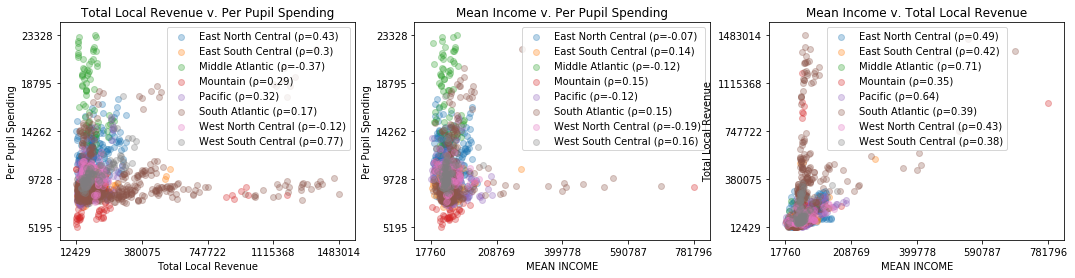

In [435]:
division_data = schlev_data.groupby(['DIVISION'])
fig, axes = plt.subplots(ncols=3)
fig.set_size_inches(18, 4)
for name, group in division_data:
    first_corr = round(group.corr().loc['TLOCREV', 'PPCSTOT'], 2)
    axes[0].scatter(x='TLOCREV', y='PPCSTOT', data=group, label=f'{name} (ρ={first_corr})', alpha=0.3)
    axes[0].set_xlabel('Total Local Revenue')
    axes[0].set_xticks(local_rev_ticks)
    axes[0].set_ylabel('Per Pupil Spending')
    axes[0].set_yticks(pps_ticks)
    axes[0].set_title('Total Local Revenue v. Per Pupil Spending')
    axes[0].legend()

    second_corr = round(group.corr().loc['MEAN INCOME', 'PPCSTOT'], 2)
    axes[1].scatter(x='MEAN INCOME', y='PPCSTOT', data=group, label=f'{name} (ρ={second_corr})', alpha=0.3)
    axes[1].set_xlabel('MEAN INCOME')
    axes[1].set_xticks(mean_income_ticks)
    axes[1].set_ylabel('Per Pupil Spending')
    axes[1].set_yticks(pps_ticks)
    axes[1].set_title('Mean Income v. Per Pupil Spending')
    axes[1].legend()

    third_corr = round(group.corr().loc['MEAN INCOME', 'TLOCREV'], 2)
    axes[2].scatter(x='MEAN INCOME', y='TLOCREV', data=group, label=f'{name} (ρ={third_corr})', alpha=0.3)
    axes[2].set_xlabel('MEAN INCOME')
    axes[2].set_xticks(mean_income_ticks)
    axes[2].set_ylabel('Total Local Revenue')
    axes[2].set_yticks(local_rev_ticks)
    axes[2].set_title('Mean Income v. Total Local Revenue')
    axes[2].legend()

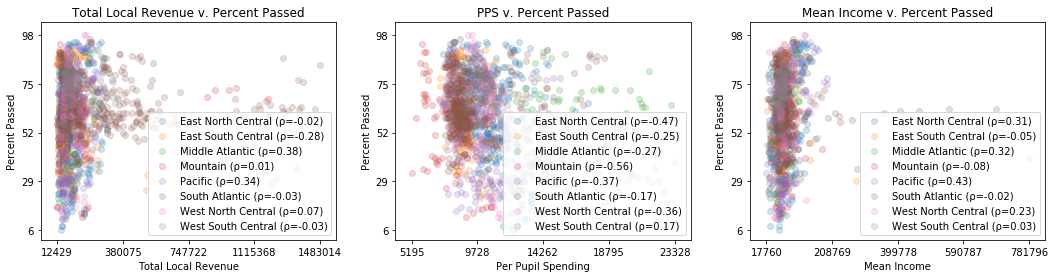

In [436]:
division_data = schlev_data.groupby(['DIVISION'])
fig, axes = plt.subplots(ncols=3)
fig.set_size_inches(18, 4)
for name, group in division_data:
    first_corr = round(group.corr().loc['TLOCREV', 'PCT_PASS'], 2)
    axes[0].scatter(x='TLOCREV', y='PCT_PASS', data=group, label=f'{name} (ρ={first_corr})', alpha=0.2)
    axes[0].set_xlabel('Total Local Revenue')
    axes[0].set_xticks(local_rev_ticks)
    axes[0].set_ylabel('Percent Passed')
    axes[0].set_yticks(pct_pass_ticks)
    axes[0].set_title('Total Local Revenue v. Percent Passed')
    axes[0].legend()

    second_corr = round(group.corr().loc['PPCSTOT', 'PCT_PASS'], 2)
    axes[1].scatter(x='PPCSTOT', y='PCT_PASS', data=group, label=f'{name} (ρ={second_corr})', alpha=0.2)
    axes[1].set_xlabel('Per Pupil Spending')
    axes[1].set_xticks(pps_ticks)
    axes[1].set_ylabel('Percent Passed')
    axes[1].set_yticks(pct_pass_ticks)
    axes[1].set_title('PPS v. Percent Passed')
    axes[1].legend()

    third_corr = round(group.corr().loc['MEAN INCOME', 'PCT_PASS'], 2)
    axes[2].scatter(x='MEAN INCOME', y='PCT_PASS', data=group, label=f'{name} (ρ={third_corr})', alpha=0.2)
    axes[2].set_xlabel('Mean Income')
    axes[2].set_xticks(mean_income_ticks)
    axes[2].set_ylabel('Percent Passed')
    axes[2].set_yticks(pct_pass_ticks)
    axes[2].set_title('Mean Income v. Percent Passed')
    axes[2].legend()

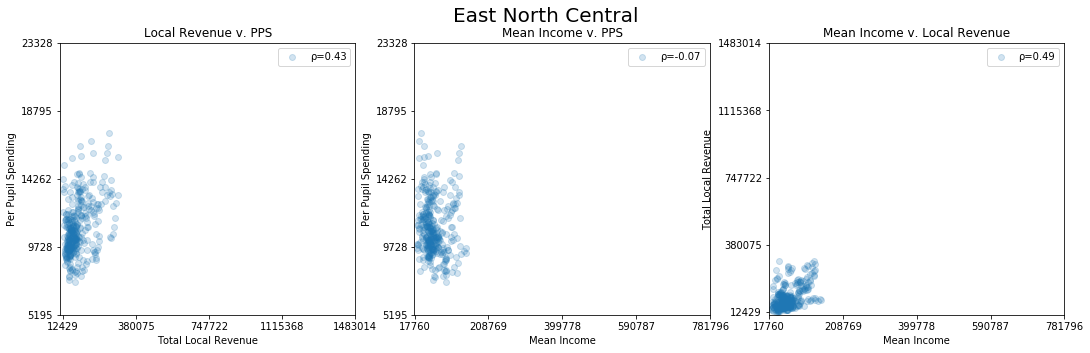

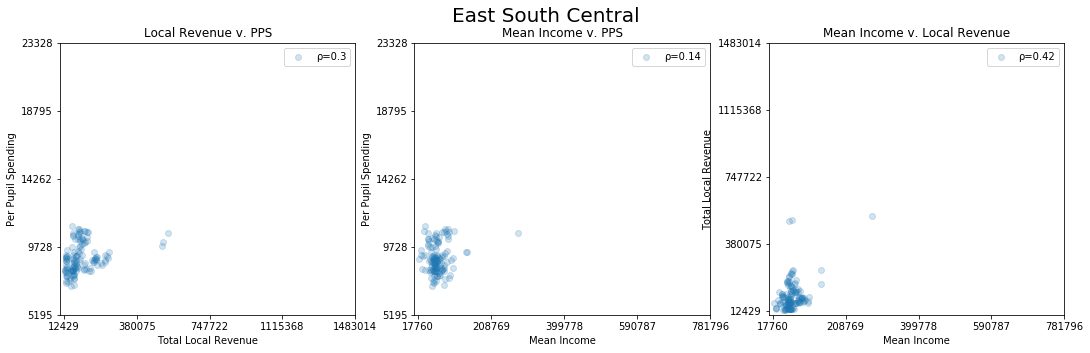

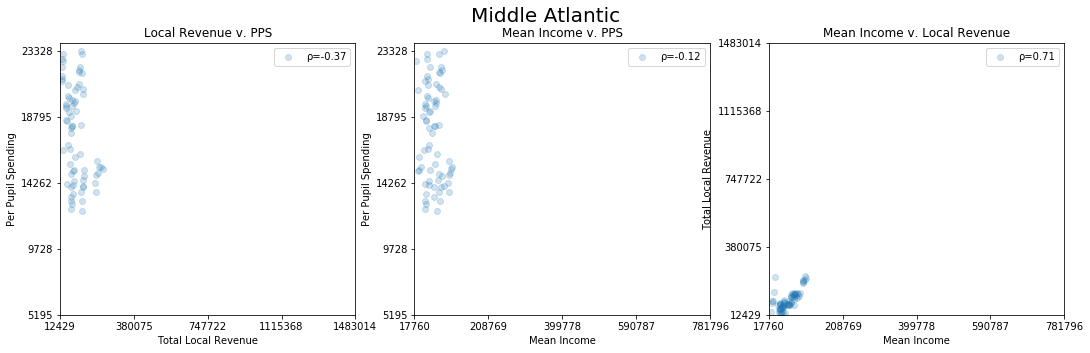

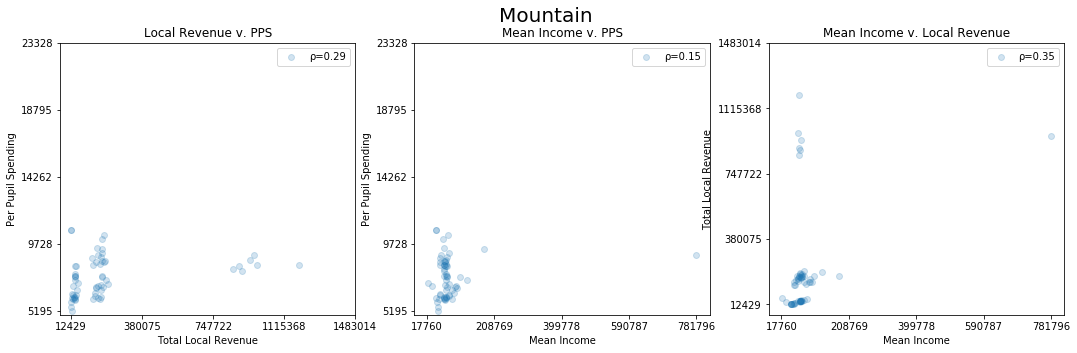

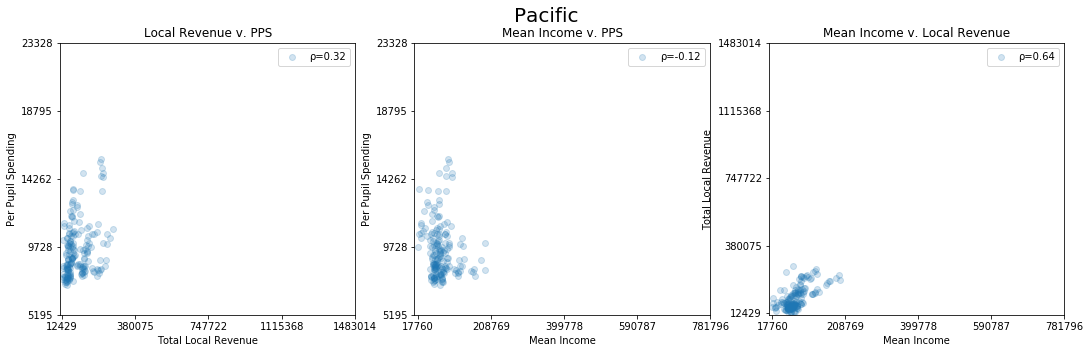

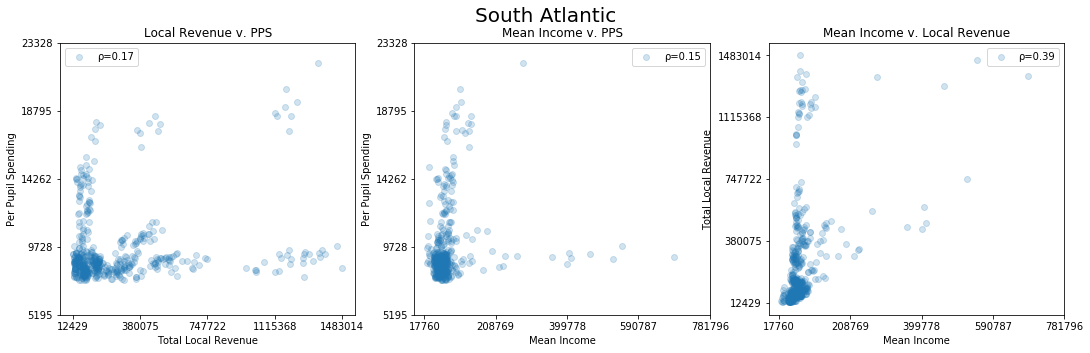

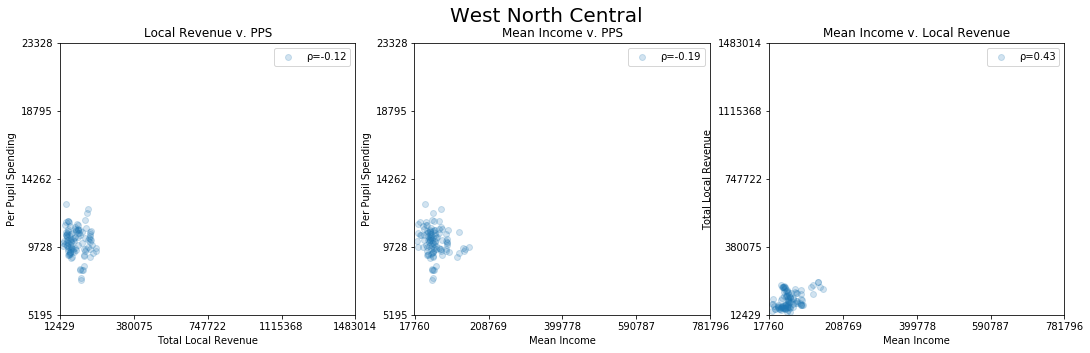

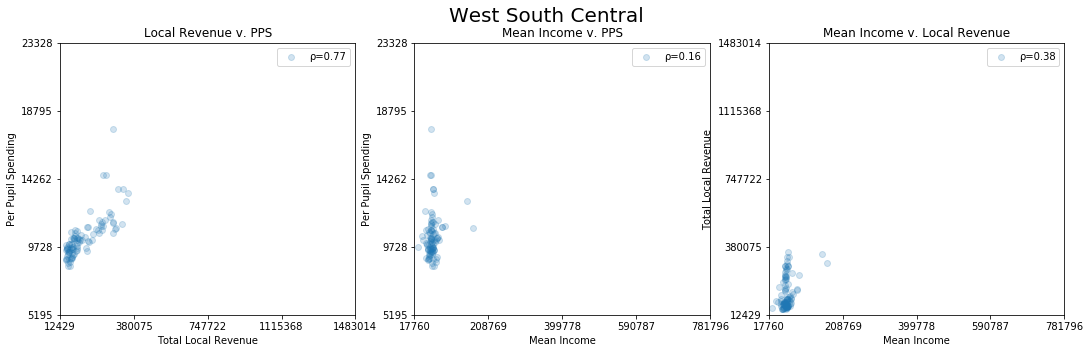

In [437]:
for name, group in division_data:
    mean_income = group['MEAN INCOME']
    local_rev = group['TLOCREV']
    per_pupil_spending = group['PPCSTOT']

    fig, axes = plt.subplots(ncols=3, nrows=1)
    fig.set_size_inches(18, 5)
    fig.suptitle(name, fontsize=20)

    first_corr = round(group.corr().loc['TLOCREV', 'PPCSTOT'], 2)
    axes[0].scatter(x=local_rev, y=per_pupil_spending, alpha=0.2)
    axes[0].set_xlabel('Total Local Revenue')
    axes[0].set_xticks(local_rev_ticks)
    axes[0].set_ylabel('Per Pupil Spending')
    axes[0].set_yticks(pps_ticks)
    axes[0].set_title('Local Revenue v. PPS')
    axes[0].legend([f'ρ={first_corr}'])

    second_corr = round(group.corr().loc['MEAN INCOME', 'PPCSTOT'], 2)
    axes[1].scatter(x=mean_income, y=per_pupil_spending, alpha=0.2)
    axes[1].set_xlabel('Mean Income')
    axes[1].set_xticks(mean_income_ticks)
    axes[1].set_ylabel('Per Pupil Spending')
    axes[1].set_yticks(pps_ticks)
    axes[1].set_title('Mean Income v. PPS')
    axes[1].legend([f'ρ={second_corr}'])

    third_corr = round(group.corr().loc['MEAN INCOME', 'TLOCREV'], 2)
    axes[2].scatter(x=mean_income, y=local_rev, alpha=0.2)
    axes[2].set_xlabel('Mean Income')
    axes[2].set_xticks(mean_income_ticks)
    axes[2].set_ylabel('Total Local Revenue')
    axes[2].set_yticks(local_rev_ticks)
    axes[2].set_title('Mean Income v. Local Revenue')
    axes[2].legend([f'ρ={third_corr}'])

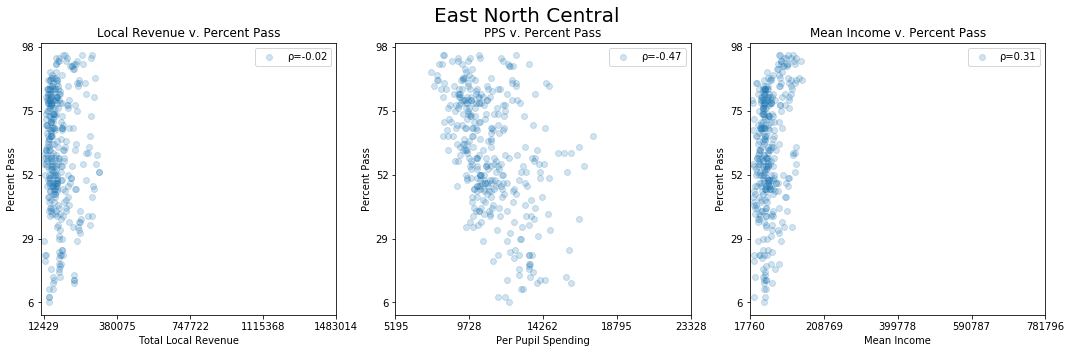

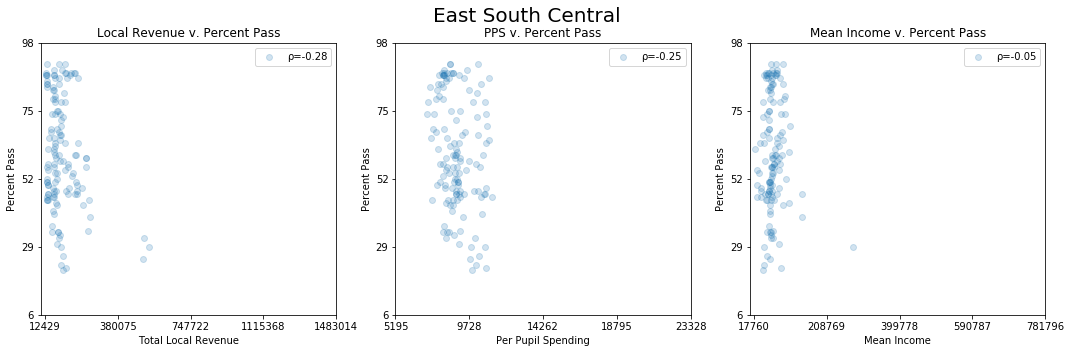

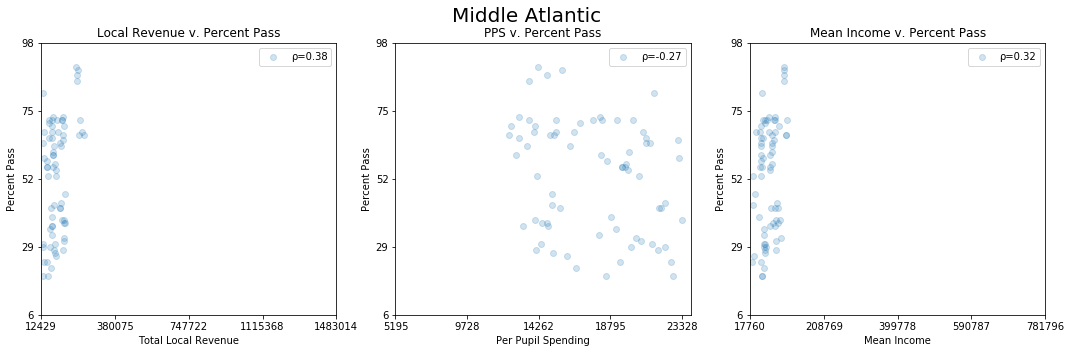

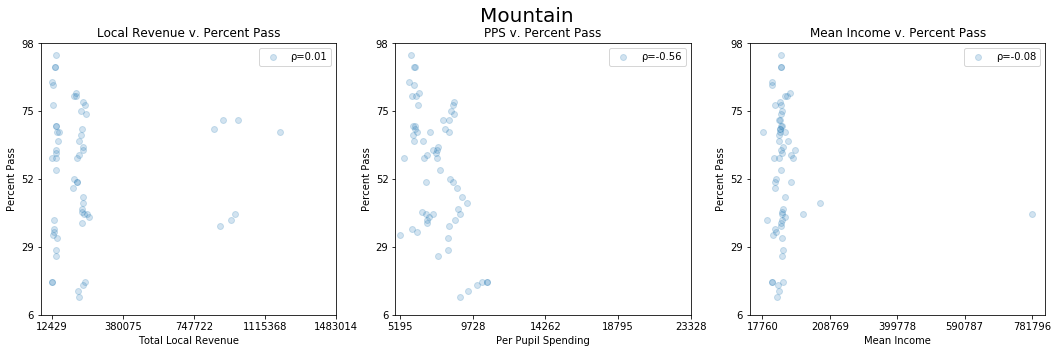

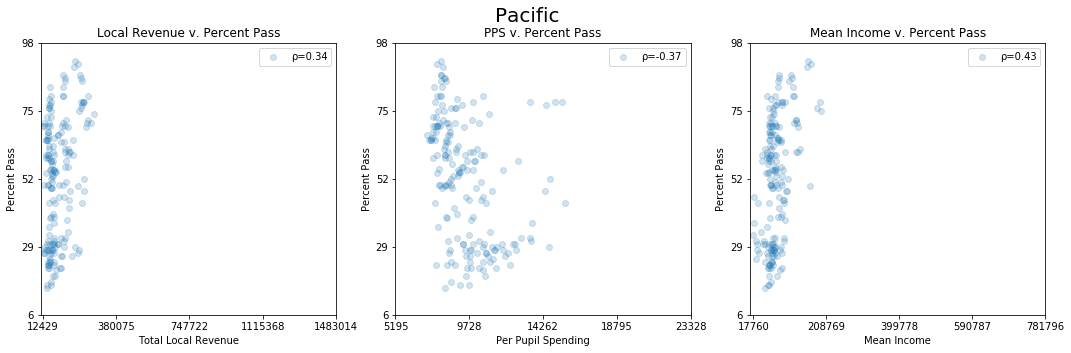

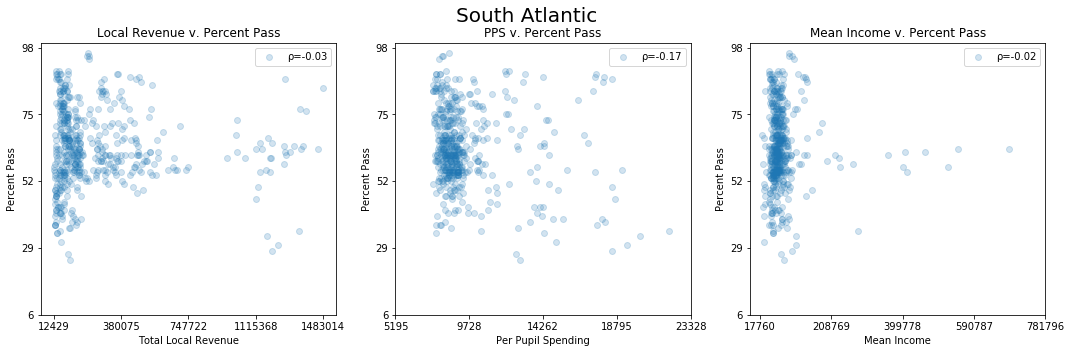

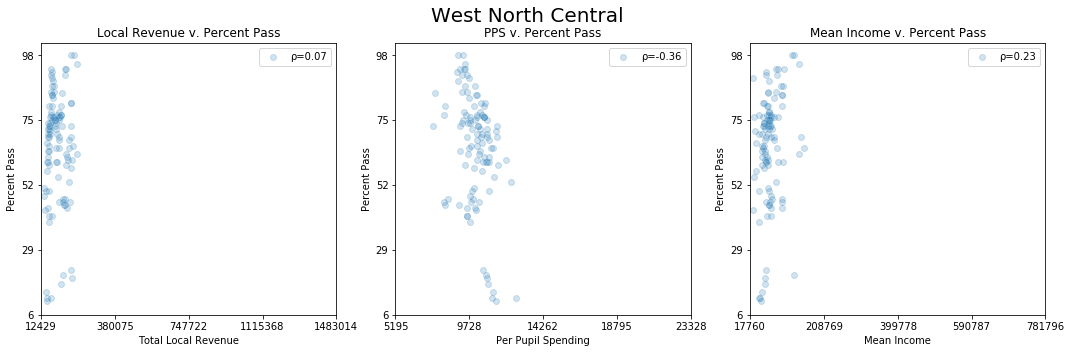

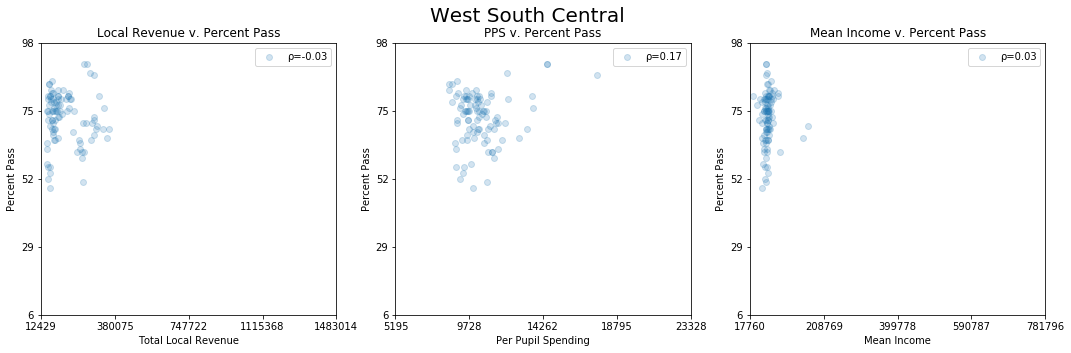

In [438]:
for name, group in division_data:
    mean_income = group['MEAN INCOME']
    local_rev = group['TLOCREV']
    per_pupil_spending = group['PPCSTOT']
    pct_pass = group['PCT_PASS']

    fig, axes = plt.subplots(ncols=3, nrows=1)
    fig.set_size_inches(18, 5)
    fig.suptitle(name, fontsize=20)

    first_corr = round(group.corr().loc['TLOCREV', 'PCT_PASS'], 2)
    axes[0].scatter(x=local_rev, y=pct_pass, alpha=0.2)
    axes[0].set_xlabel('Total Local Revenue')
    axes[0].set_xticks(local_rev_ticks)
    axes[0].set_ylabel('Percent Pass')
    axes[0].set_yticks(pct_pass_ticks)
    axes[0].set_title('Local Revenue v. Percent Pass')
    axes[0].legend([f'ρ={first_corr}'])

    second_corr = round(group.corr().loc['PPCSTOT', 'PCT_PASS'], 2)
    axes[1].scatter(x=per_pupil_spending, y=pct_pass, alpha=0.2)
    axes[1].set_xlabel('Per Pupil Spending')
    axes[1].set_xticks(pps_ticks)
    axes[1].set_ylabel('Percent Pass')
    axes[1].set_yticks(pct_pass_ticks)
    axes[1].set_title('PPS v. Percent Pass')
    axes[1].legend([f'ρ={second_corr}'])

    third_corr = round(group.corr().loc['MEAN INCOME', 'PCT_PASS'], 2)
    axes[2].scatter(x=mean_income, y=pct_pass, alpha=0.2)
    axes[2].set_xlabel('Mean Income')
    axes[2].set_xticks(mean_income_ticks)
    axes[2].set_ylabel('Percent Pass')
    axes[2].set_yticks(pct_pass_ticks)
    axes[2].set_title('Mean Income v. Percent Pass')
    axes[2].legend([f'ρ={third_corr}'])

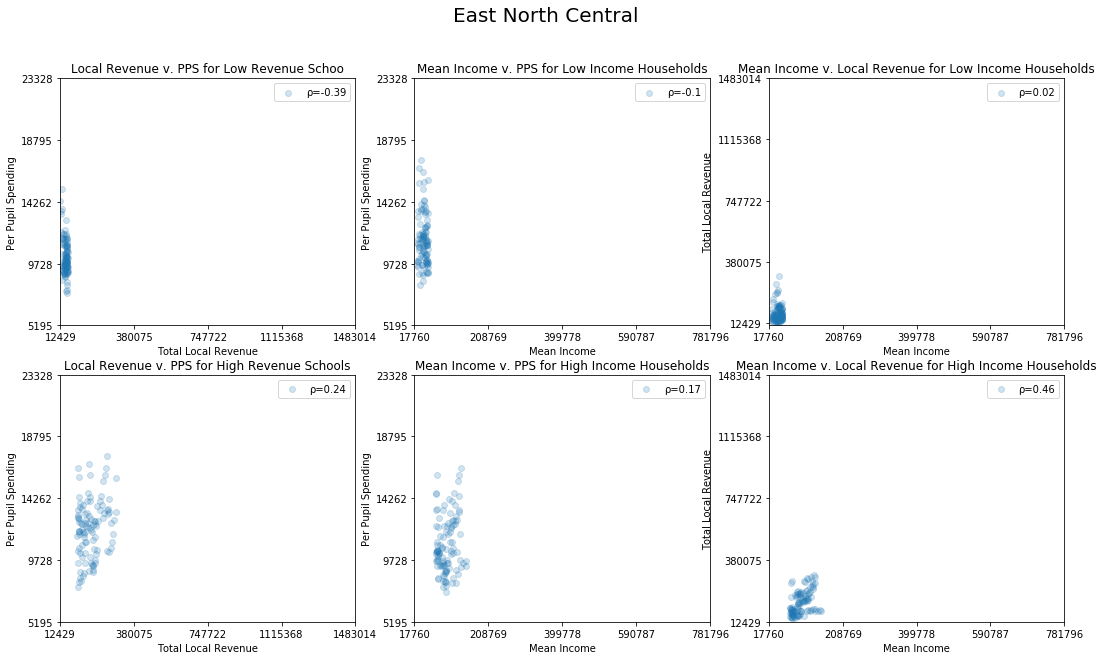

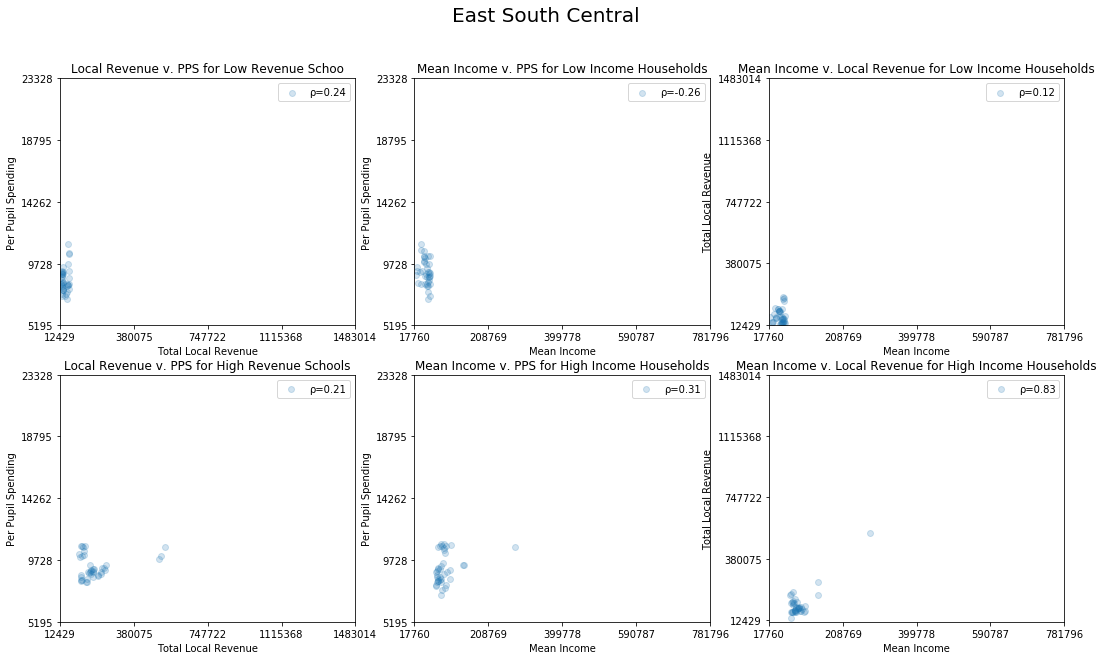

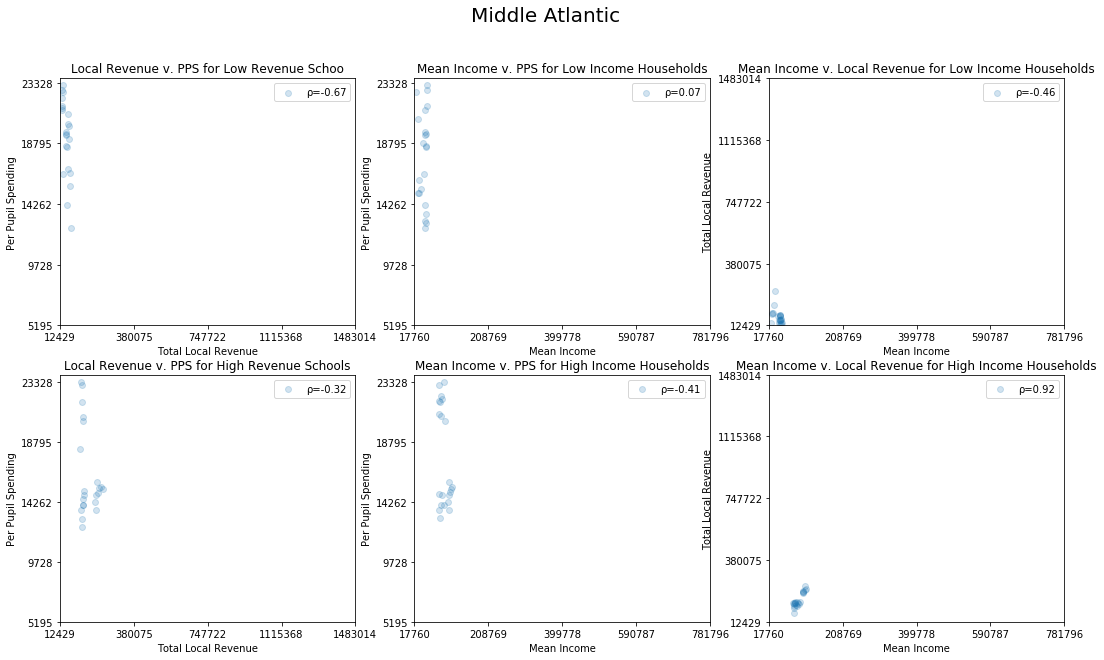

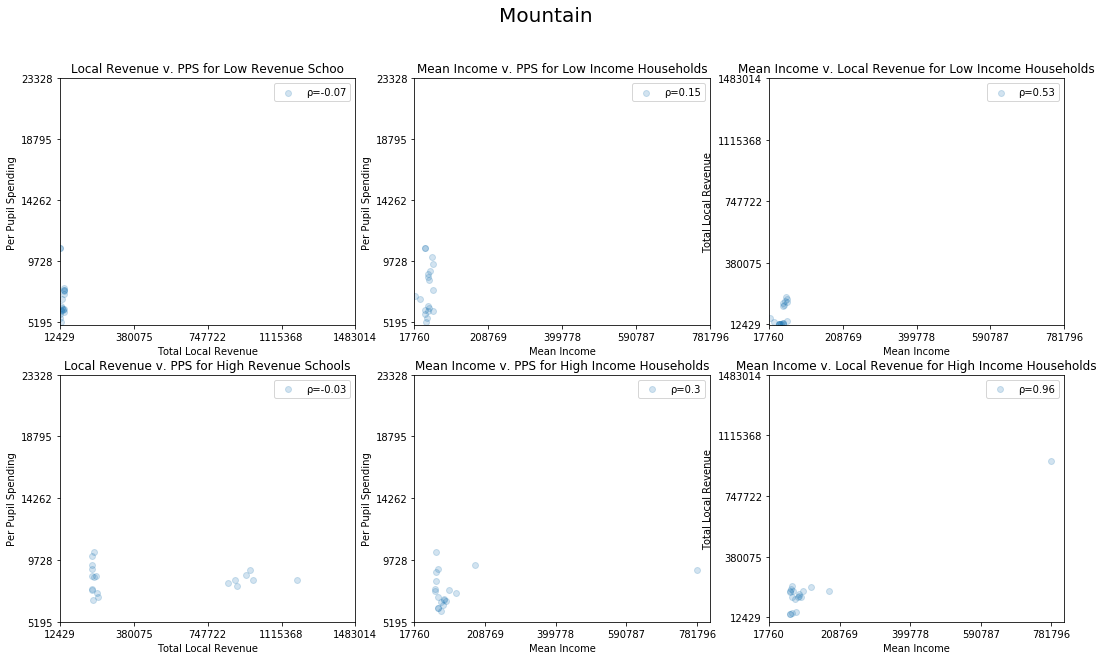

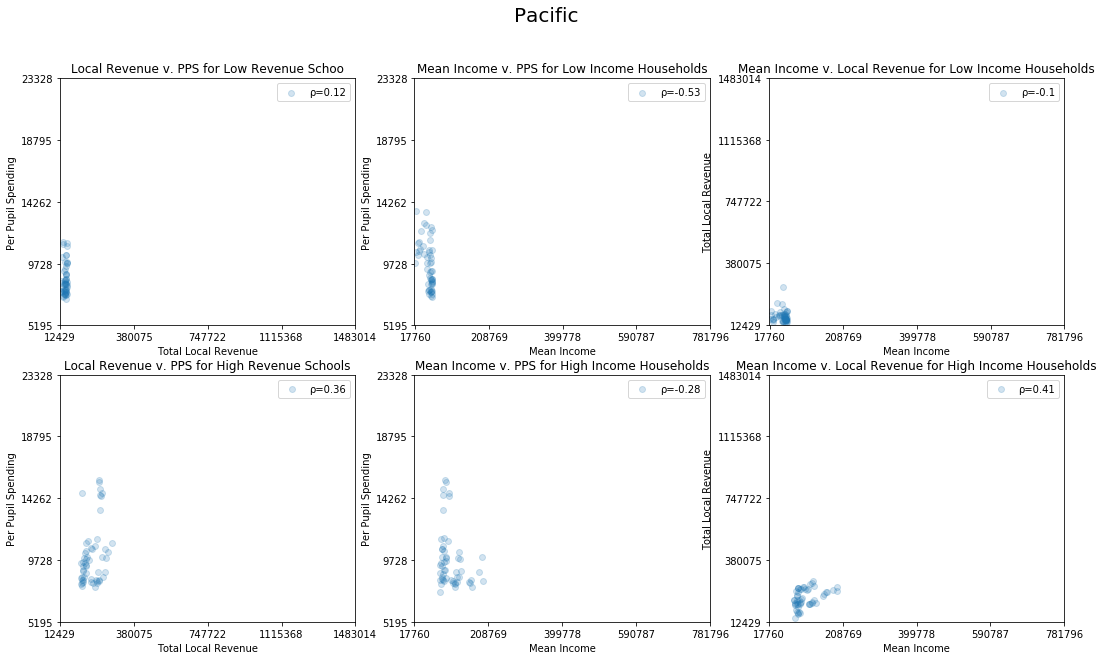

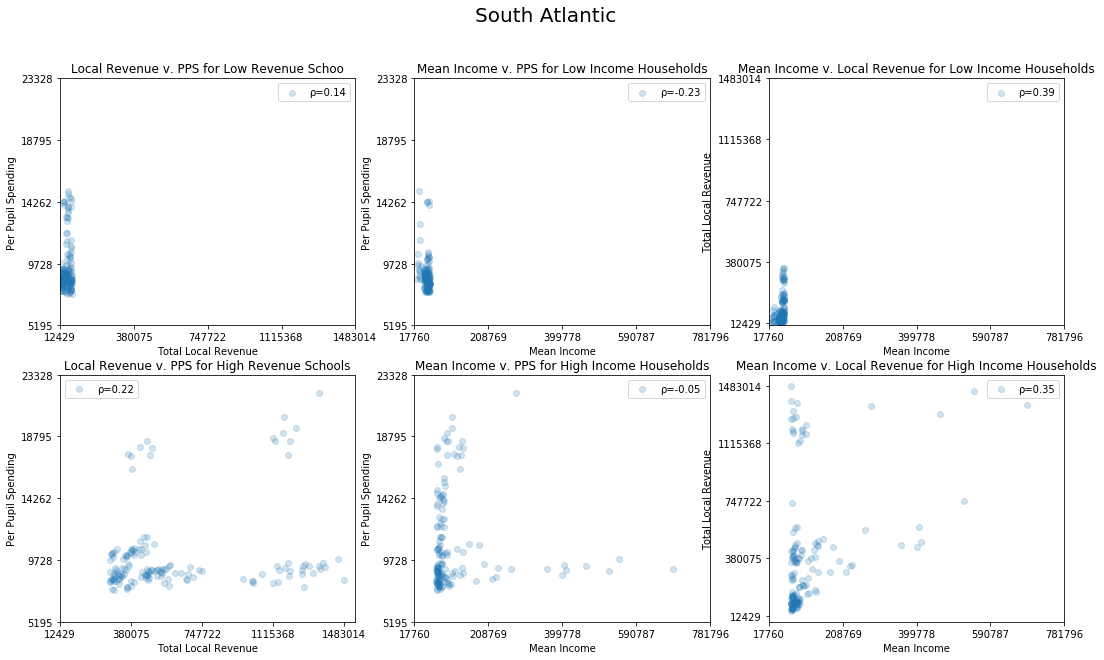

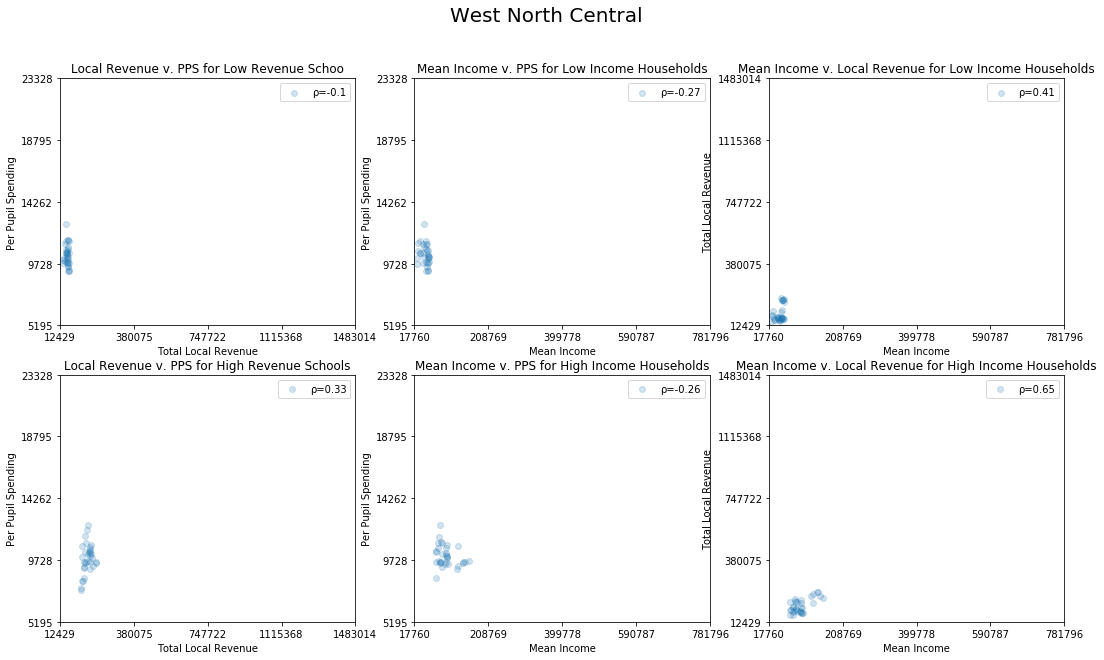

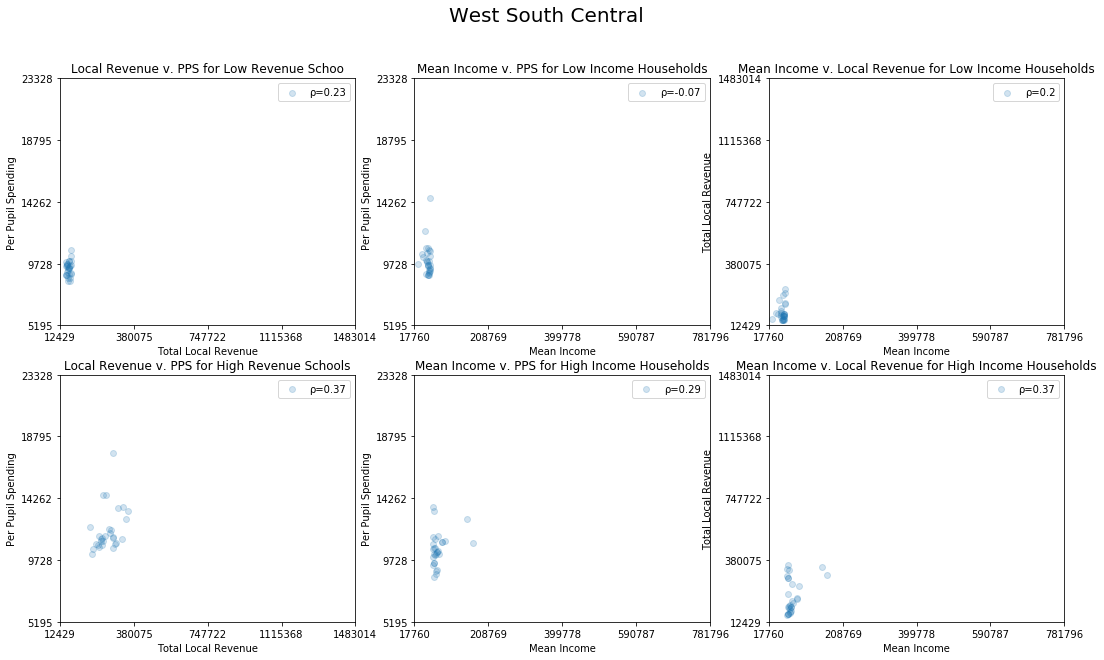

In [439]:
for name, group in division_data:
    low_quantile = .3
    high_quantile = .7

    mean_income = group['MEAN INCOME']
    min_income = mean_income.min()
    max_income = mean_income.max()
    low_income_qtl = mean_income.quantile(q=low_quantile)
    high_income_qtl = mean_income.quantile(q=high_quantile)
    low_income_grp = group[mean_income < low_income_qtl]
    high_income_grp = group[mean_income > high_income_qtl]

    local_rev = group['TLOCREV']
    min_rev = local_rev.min()
    max_rev = local_rev.max()
    low_rev_qtl = local_rev.quantile(q=low_quantile)
    high_rev_qtl = local_rev.quantile(q=high_quantile)
    low_rev_grp = group[local_rev < low_rev_qtl]
    high_rev_grp = group[local_rev > high_rev_qtl]

    per_pupil_spending = group['PPCSTOT']
    min_pps = per_pupil_spending.min()
    max_pps = per_pupil_spending.max()
    low_pps_qtl = per_pupil_spending.quantile(q=low_quantile)
    high_pps_qtl = per_pupil_spending.quantile(q=high_quantile)
    low_pps_grp = group[per_pupil_spending < low_pps_qtl]
    high_pps_grp = group[per_pupil_spending > high_pps_qtl]

    fig, axes = plt.subplots(ncols=3, nrows=2)
    fig.set_size_inches(18, 10)
    fig.suptitle(name, fontsize=20)

    first_corr = round(low_rev_grp.corr().loc['TLOCREV', 'PPCSTOT'], 2)
    axes[0][0].scatter(x=low_rev_grp['TLOCREV'], y=low_rev_grp['PPCSTOT'], alpha=0.2)
    axes[0][0].set_xlabel('Total Local Revenue')
    axes[0][0].set_xticks(local_rev_ticks)
    axes[0][0].set_ylabel('Per Pupil Spending')
    axes[0][0].set_yticks(pps_ticks)
    axes[0][0].set_title('Local Revenue v. PPS for Low Revenue Schoo')
    axes[0][0].legend([f'ρ={first_corr}'])

    second_corr = round(low_income_grp.corr().loc['MEAN INCOME', 'PPCSTOT'], 2)
    axes[0][1].scatter(x=low_income_grp['MEAN INCOME'], y=low_income_grp['PPCSTOT'], alpha=0.2)
    axes[0][1].set_xlabel('Mean Income')
    axes[0][1].set_xticks(mean_income_ticks)
    axes[0][1].set_ylabel('Per Pupil Spending')
    axes[0][1].set_yticks(pps_ticks)
    axes[0][1].set_title('Mean Income v. PPS for Low Income Households')
    axes[0][1].legend([f'ρ={second_corr}'])

    third_corr = round(low_income_grp.corr().loc['MEAN INCOME', 'TLOCREV'], 2)
    axes[0][2].scatter(x=low_income_grp['MEAN INCOME'], y=low_income_grp['TLOCREV'], alpha=0.2)
    axes[0][2].set_xlabel('Mean Income')
    axes[0][2].set_xticks(mean_income_ticks)
    axes[0][2].set_ylabel('Total Local Revenue')
    axes[0][2].set_yticks(local_rev_ticks)
    axes[0][2].set_title('Mean Income v. Local Revenue for Low Income Households')
    axes[0][2].legend([f'ρ={third_corr}'])
    
    fourth_corr = round(high_rev_grp.corr().loc['TLOCREV', 'PPCSTOT'], 2)
    axes[1][0].scatter(x=high_rev_grp['TLOCREV'], y=high_rev_grp['PPCSTOT'], alpha=0.2)
    axes[1][0].set_xlabel('Total Local Revenue')
    axes[1][0].set_xticks(local_rev_ticks)
    axes[1][0].set_ylabel('Per Pupil Spending')
    axes[1][0].set_yticks(pps_ticks)
    axes[1][0].set_title('Local Revenue v. PPS for High Revenue Schools')
    axes[1][0].legend([f'ρ={fourth_corr}'])

    fifth_corr = round(high_income_grp.corr().loc['MEAN INCOME', 'PPCSTOT'], 2)
    axes[1][1].scatter(x=high_income_grp['MEAN INCOME'], y=high_income_grp['PPCSTOT'], alpha=0.2)
    axes[1][1].set_xlabel('Mean Income')
    axes[1][1].set_xticks(mean_income_ticks)
    axes[1][1].set_ylabel('Per Pupil Spending')
    axes[1][1].set_yticks(pps_ticks)
    axes[1][1].set_title('Mean Income v. PPS for High Income Households')
    axes[1][1].legend([f'ρ={fifth_corr}'])

    sixth_corr = round(high_income_grp.corr().loc['MEAN INCOME', 'TLOCREV'], 2)
    axes[1][2].scatter(x=high_income_grp['MEAN INCOME'], y=high_income_grp['TLOCREV'], alpha=0.2)
    axes[1][2].set_xlabel('Mean Income')
    axes[1][2].set_xticks(mean_income_ticks)
    axes[1][2].set_ylabel('Total Local Revenue')
    axes[1][2].set_yticks(local_rev_ticks)
    axes[1][2].set_title('Mean Income v. Local Revenue for High Income Households')
    axes[1][2].legend([f'ρ={sixth_corr}'])

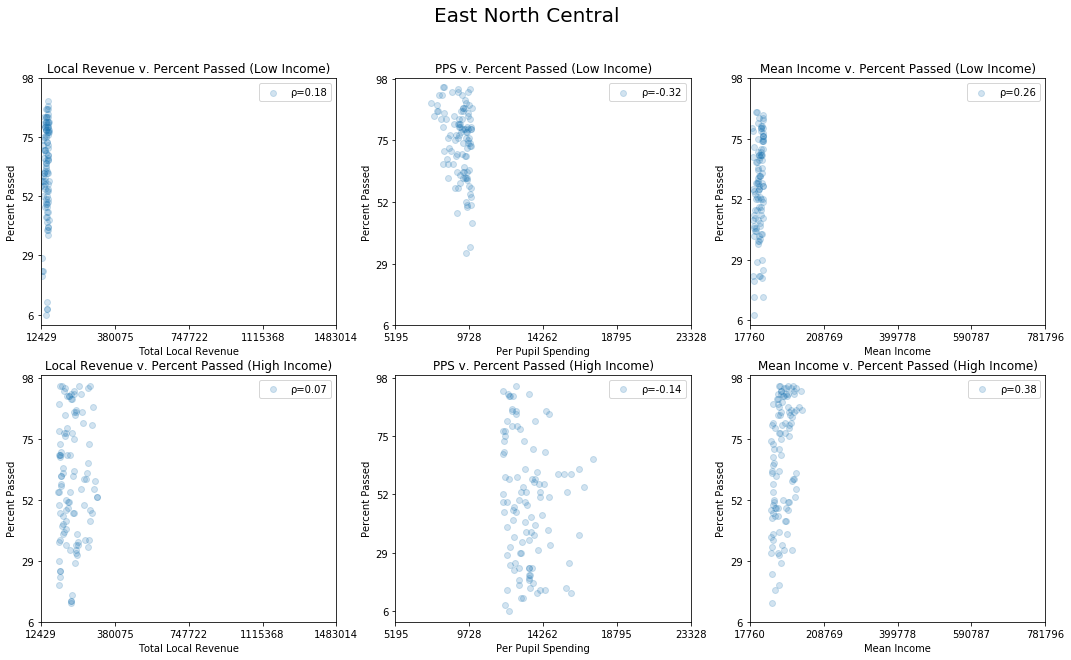

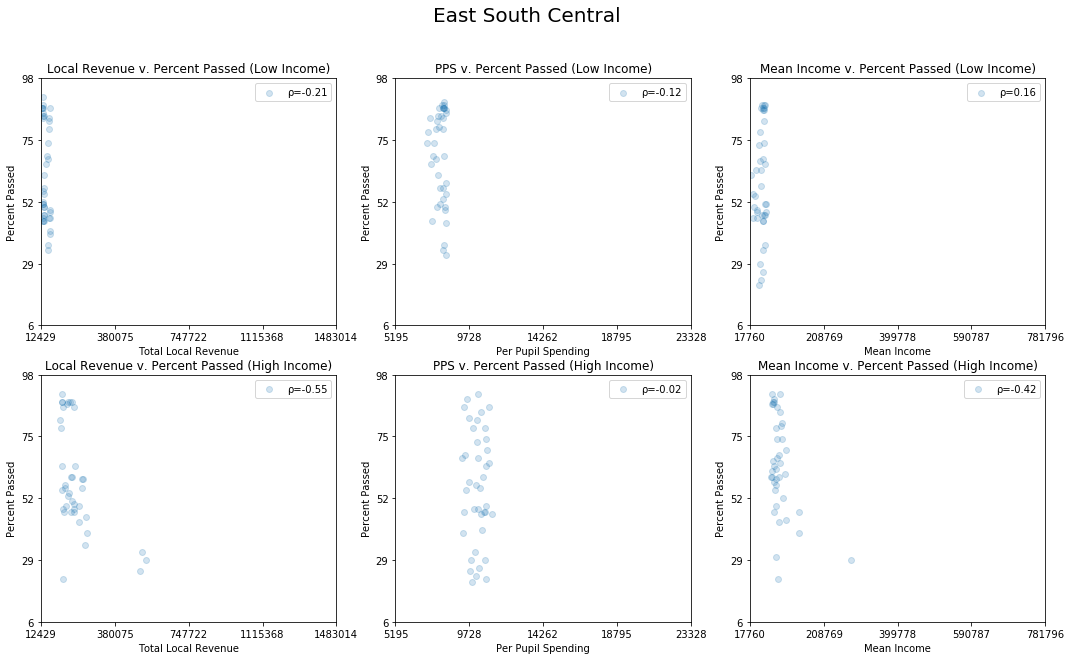

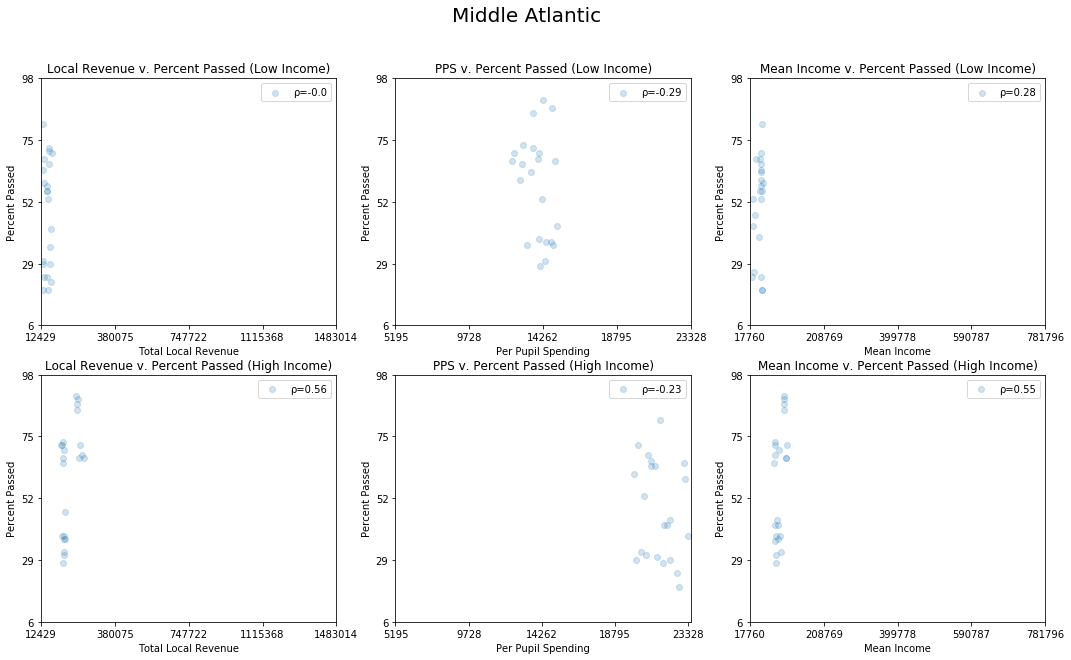

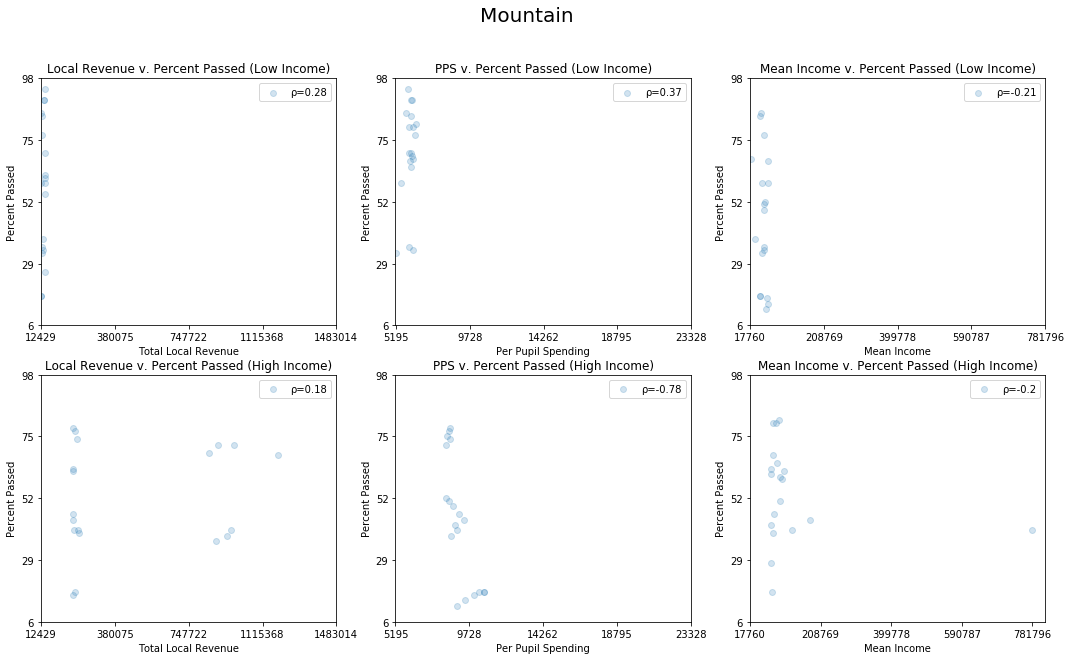

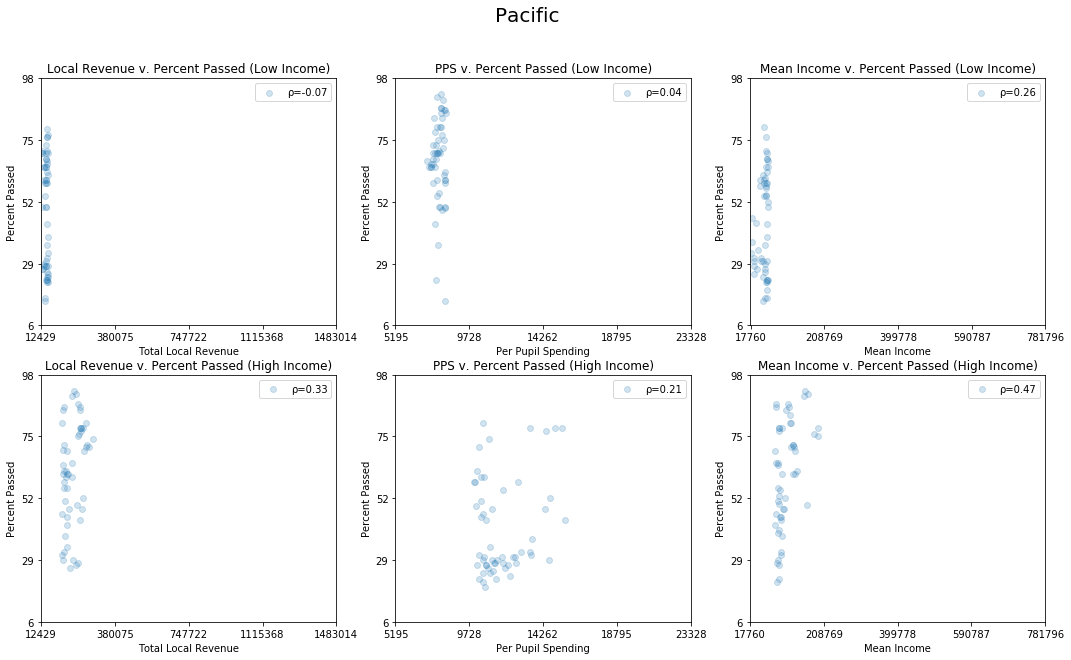

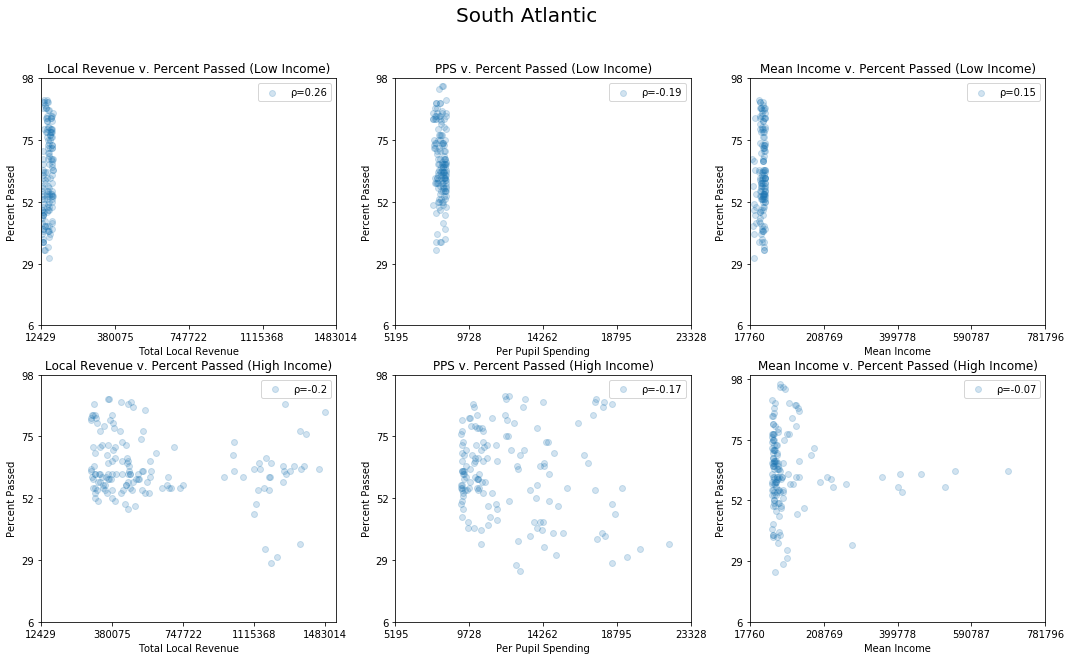

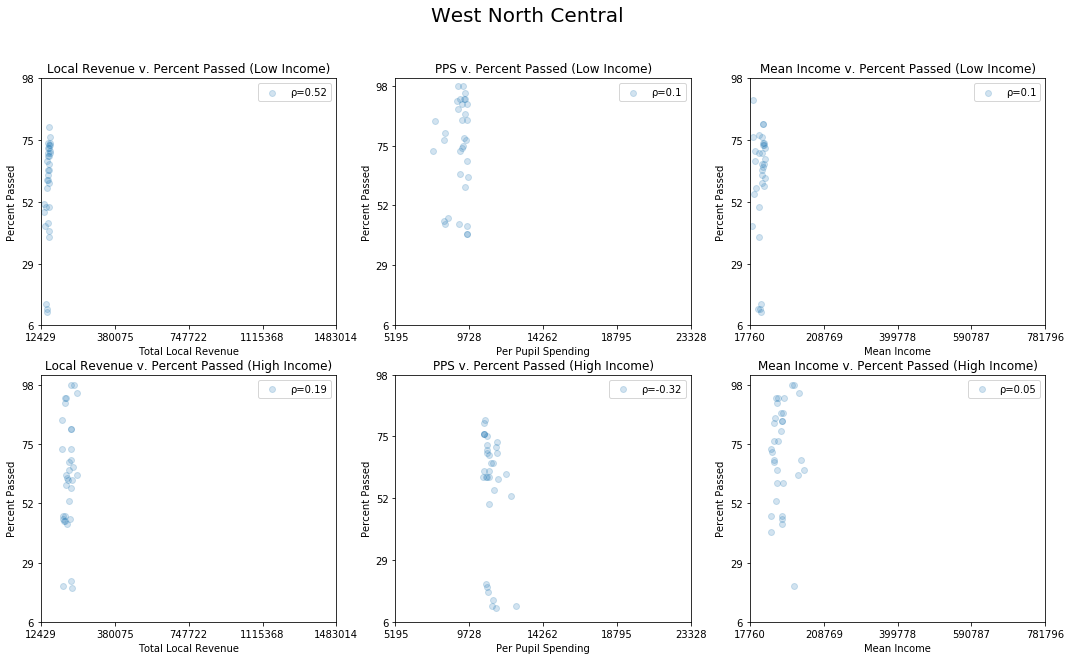

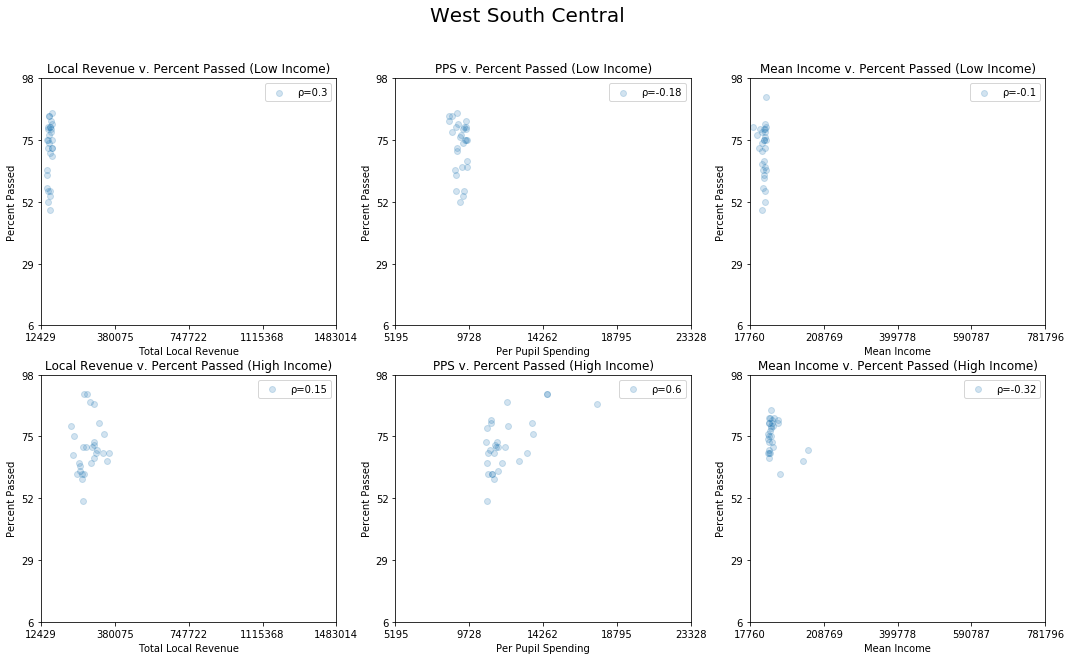

In [440]:
for name, group in division_data:
    low_quantile = .3
    high_quantile = .7

    mean_income = group['MEAN INCOME']
    min_income = mean_income.min()
    max_income = mean_income.max()
    low_income_qtl = mean_income.quantile(q=low_quantile)
    high_income_qtl = mean_income.quantile(q=high_quantile)
    low_income_grp = group[mean_income < low_income_qtl]
    high_income_grp = group[mean_income > high_income_qtl]

    local_rev = group['TLOCREV']
    min_rev = local_rev.min()
    max_rev = local_rev.max()
    low_rev_qtl = local_rev.quantile(q=low_quantile)
    high_rev_qtl = local_rev.quantile(q=high_quantile)
    low_rev_grp = group[local_rev < low_rev_qtl]
    high_rev_grp = group[local_rev > high_rev_qtl]

    per_pupil_spending = group['PPCSTOT']
    min_pps = per_pupil_spending.min()
    max_pps = per_pupil_spending.max()
    low_pps_qtl = per_pupil_spending.quantile(q=low_quantile)
    high_pps_qtl = per_pupil_spending.quantile(q=high_quantile)
    low_pps_grp = group[per_pupil_spending < low_pps_qtl]
    high_pps_grp = group[per_pupil_spending > high_pps_qtl]

    fig, axes = plt.subplots(ncols=3, nrows=2)
    fig.set_size_inches(18, 10)
    fig.suptitle(name, fontsize=20)

    first_corr = round(low_rev_grp.corr().loc['TLOCREV', 'PCT_PASS'], 2)
    axes[0][0].scatter(x=low_rev_grp['TLOCREV'], y=low_rev_grp['PCT_PASS'], alpha=0.2)
    axes[0][0].set_xlabel('Total Local Revenue')
    axes[0][0].set_xticks(local_rev_ticks)
    axes[0][0].set_ylabel('Percent Passed')
    axes[0][0].set_yticks(pct_pass_ticks)
    axes[0][0].set_title('Local Revenue v. Percent Passed (Low Income)')
    axes[0][0].legend([f'ρ={first_corr}'])

    second_corr = round(low_pps_grp.corr().loc['PPCSTOT', 'PCT_PASS'], 2)
    axes[0][1].scatter(x=low_pps_grp['PPCSTOT'], y=low_pps_grp['PCT_PASS'], alpha=0.2)
    axes[0][1].set_xlabel('Per Pupil Spending')
    axes[0][1].set_xticks(pps_ticks)
    axes[0][1].set_ylabel('Percent Passed')
    axes[0][1].set_yticks(pct_pass_ticks)
    axes[0][1].set_title('PPS v. Percent Passed (Low Income)')
    axes[0][1].legend([f'ρ={second_corr}'])

    third_corr = round(low_income_grp.corr().loc['MEAN INCOME', 'PCT_PASS'], 2)
    axes[0][2].scatter(x=low_income_grp['MEAN INCOME'], y=low_income_grp['PCT_PASS'], alpha=0.2)
    axes[0][2].set_xlabel('Mean Income')
    axes[0][2].set_xticks(mean_income_ticks)
    axes[0][2].set_ylabel('Percent Passed')
    axes[0][2].set_yticks(pct_pass_ticks)
    axes[0][2].set_title('Mean Income v. Percent Passed (Low Income)')
    axes[0][2].legend([f'ρ={third_corr}'])
    
    fourth_corr = round(high_rev_grp.corr().loc['TLOCREV', 'PCT_PASS'], 2)
    axes[1][0].scatter(x=high_rev_grp['TLOCREV'], y=high_rev_grp['PCT_PASS'], alpha=0.2)
    axes[1][0].set_xlabel('Total Local Revenue')
    axes[1][0].set_xticks(local_rev_ticks)
    axes[1][0].set_ylabel('Percent Passed')
    axes[1][0].set_yticks(pct_pass_ticks)
    axes[1][0].set_title('Local Revenue v. Percent Passed (High Income)')
    axes[1][0].legend([f'ρ={fourth_corr}'])

    fifth_corr = round(high_pps_grp.corr().loc['PPCSTOT', 'PCT_PASS'], 2)
    axes[1][1].scatter(x=high_pps_grp['PPCSTOT'], y=high_pps_grp['PCT_PASS'], alpha=0.2)
    axes[1][1].set_xlabel('Per Pupil Spending')
    axes[1][1].set_xticks(pps_ticks)
    axes[1][1].set_ylabel('Percent Passed')
    axes[1][1].set_yticks(pct_pass_ticks)
    axes[1][1].set_title('PPS v. Percent Passed (High Income)')
    axes[1][1].legend([f'ρ={fifth_corr}'])

    sixth_corr = round(high_income_grp.corr().loc['MEAN INCOME', 'PCT_PASS'], 2)
    axes[1][2].scatter(x=high_income_grp['MEAN INCOME'], y=high_income_grp['PCT_PASS'], alpha=0.2)
    axes[1][2].set_xlabel('Mean Income')
    axes[1][2].set_xticks(mean_income_ticks)
    axes[1][2].set_ylabel('Percent Passed')
    axes[1][2].set_yticks(pct_pass_ticks)
    axes[1][2].set_title('Mean Income v. Percent Passed (High Income)')
    axes[1][2].legend([f'ρ={sixth_corr}'])

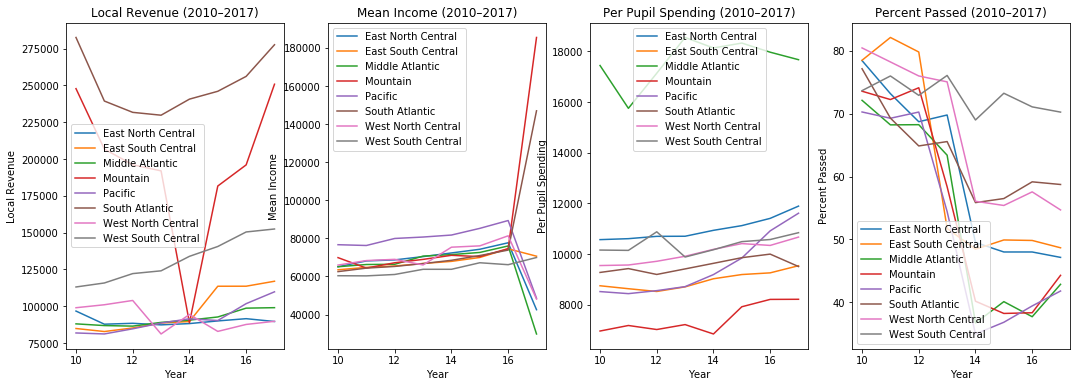

In [441]:
fig, axes = plt.subplots(ncols=4)
fig.set_size_inches(18, 6)
division_data_by_year = schlev_data.groupby(['DIVISION', 'YRDATA']).mean()
for region in division_data_by_year.index.levels[0]:
    year_data = division_data_by_year.xs(region)

    axes[0].plot(year_data.index.values, year_data['TLOCREV'], label=region)
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Local Revenue')
    axes[0].set_title('Local Revenue (2010–2017)')
    axes[0].legend()
    
    axes[1].plot(year_data.index.values, year_data['MEAN INCOME'], label=region)
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel('Mean Income')
    axes[1].set_title('Mean Income (2010–2017)')
    axes[1].legend()
    
    axes[2].plot(year_data.index.values, year_data['PPCSTOT'], label=region)
    axes[2].set_xlabel('Year')
    axes[2].set_ylabel('Per Pupil Spending')
    axes[2].set_title('Per Pupil Spending (2010–2017)')
    axes[2].legend()

    axes[3].plot(year_data.index.values, year_data['PCT_PASS'], label=region)
    axes[3].set_xlabel('Year')
    axes[3].set_ylabel('Percent Passed')
    axes[3].set_title('Percent Passed (2010–2017)')
    axes[3].legend()

The South Atlantic has the high local revenue out of all the districts which probably caused the greater local revenue seen in the South region. The Middle Atlantic has the highest per pupil spending of all the districts, which accounts for the higher pps in the Northeast region.

There seem to be a few groups of districts peforming on a similar level on the scale of percent passed. The Mountain, Middle Atlantic, Pacific are performing worst than the other districts. The East North Central and East South Central are performing a bit better. South Atlantic and West North Central are performing a bit better than that—almost at 60 percent. The West South Central district is performing best with an about 75-percent passing rate.

**Conclusion:**
We have not come to a solid conclusion about the data. Further analysis would be necessary to have any amount of certainy. For the purposes of the study, Mean Income, Total Local Revenue, and Per Pupil Spending were not string predictors of Percent Passed.

In order to create a clearer picture about what influences the "quality of education" in the United States we would need more time to dive down deeper into the data. With more time we could compare the West and Northeast, which were most similar, to the rest of the US. We could also dive down into the West South Central to try to learn why it has the highest scores over all. Finally we would want to do more research and conduct a further EDA with other factors that may be playing a role here.